# Star Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. Star Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by Star Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

<IPython.core.display.Javascript object>

## Import the data and make a backup copy

In [2]:
dfshg = pd.read_csv(
    "StarHotelsGroup.csv"
)  # reading the data and load in Pandas dataframe
dfshg_bkup = dfshg.copy()  # making a backup

<IPython.core.display.Javascript object>

## Data Overview

#### Display head of the data

In [3]:
dfshg.head()  # checking head of the data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,3,0,0,3,Not Selected,0,Room_Type 1,277,2019,7,13,Online,0,0,0,89.10,2,Canceled


<IPython.core.display.Javascript object>

#### Display tail of the data

In [4]:
dfshg.tail()  # checking tail of the data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
56921,2,1,0,1,Meal Plan 2,0,Room_Type 4,45,2019,6,15,Online,0,0,0,163.88,1,Not_Canceled
56922,2,0,1,1,Meal Plan 1,0,Room_Type 1,320,2019,5,15,Offline,0,0,0,90.00,1,Canceled
56923,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
56924,2,0,2,2,Not Selected,0,Room_Type 1,6,2019,4,28,Online,0,0,0,162.50,2,Not_Canceled
56925,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


<IPython.core.display.Javascript object>

#### Understanding the shape of the data

In [5]:
dfshg.shape  # shape of the data

(56926, 18)

<IPython.core.display.Javascript object>

#### Observations:

- Dataset got loaded properly.
- The first and last 5 rows looks good and as per the data dictionary provided.
- We can observe that there are **56926** observations and each observations has **18** different attributes

#### Check data types for the columns of the data

In [6]:
dfshg.info()  # checking information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56926 entries, 0 to 56925
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          56926 non-null  int64  
 1   no_of_children                        56926 non-null  int64  
 2   no_of_weekend_nights                  56926 non-null  int64  
 3   no_of_week_nights                     56926 non-null  int64  
 4   type_of_meal_plan                     56926 non-null  object 
 5   required_car_parking_space            56926 non-null  int64  
 6   room_type_reserved                    56926 non-null  object 
 7   lead_time                             56926 non-null  int64  
 8   arrival_year                          56926 non-null  int64  
 9   arrival_month                         56926 non-null  int64  
 10  arrival_date                          56926 non-null  int64  
 11  market_segment_

<IPython.core.display.Javascript object>

#### Observations:

- avg_price_per_room is continuous in nature, and loaded as float, which looks correct
- All other numerical columns are loaded as int, they are as per our understanding from the data definition provided and discreet in nature. There are total 13 columns as such.
- There are 4 columns which are text type and loaded as object, which looks correct as per the data definition provided.
- We can observe all 18 columns has 56926 non null values, in the first look there are no missing values.

#### Missing value check

In [7]:
dfshg.isnull().sum()  # gives column wise null value count

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:

- As we observed earlier as well, this confirms we do not have any missing values.

#### Duplicate check

In [8]:
dfshg.duplicated().value_counts()  # gives if any dupplicate values are present

False    42576
True     14350
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:

- We can observe there are 14350 observations which are duplicate, we have to remove them as they could create data leakage issue during model performance evaluation

#### Dropping the duplicate values

In [9]:
dfshg = dfshg.drop_duplicates()  # this will drop duplicate rows from the dataset
print("After dropping duplicates the shape of the data is", dfshg.shape)

After dropping duplicates the shape of the data is (42576, 18)


<IPython.core.display.Javascript object>

#### Observations:

- We have dropped the duplicate rows from the dataset, now we have total 42576 observations with 18 columns.

## Exploratory Data Analysis (EDA)

- We will first explore the data set and then try to answer some of the below key questions business has

**Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### Summary of the dataset

In [10]:
dfshg.describe().T  # transposing the output for better readability

,count,mean,std,min,25%,50%,75%,max
no_of_adults,42576.0,1.916737,0.527524,0.0,2.0,2.0,2.0,4.0
no_of_children,42576.0,0.142146,0.459920,0.0,0.0,0.0,0.0,10.0
no_of_weekend_nights,42576.0,0.895270,0.887864,0.0,0.0,1.0,2.0,8.0
no_of_week_nights,42576.0,2.321167,1.519328,0.0,1.0,2.0,3.0,17.0
required_car_parking_space,42576.0,0.034362,0.182160,0.0,0.0,0.0,0.0,1.0
lead_time,42576.0,77.315953,77.279616,0.0,16.0,53.0,118.0,521.0
arrival_year,42576.0,2018.297891,0.626126,2017.0,2018.0,2018.0,2019.0,2019.0
arrival_month,42576.0,6.365488,3.051924,1.0,4.0,6.0,9.0,12.0
arrival_date,42576.0,15.682873,8.813991,1.0,8.0,16.0,23.0,31.0
repeated_guest,42576.0,0.030886,0.173011,0.0,0.0,0.0,0.0,1.0


<IPython.core.display.Javascript object>

#### Observations:

- `no_of_adults` Majority of the bookings are made for 2 adults, with maximum of adults per booking is 4, but we see bookings with adults count as 0 as well
- `no_of_children` For 75% of the bookings data are with 0 childs, however we see bookings with no of children as high as 10
- `no_of_weekend_nights` Majority of the bookings/stay are of 1/2 weekend nights, but we see bookings with 8 weekend nights as well
- `no_of_week_nights` Majority of the bookings/stay are for 1 to 3 week nights, however we see bookings with as high as 17 week nights
- `required_car_parking_space` Majority of bookings doesn't show parking requirement.
- `lead_time` Booking lead time shows observations as high as 521 days which is close to 1 and half years, which is unusually high, majority of bookings are with lead time less than 3 months (118 days)
- Observations of bookings with arrival year are ranging from 2017 to 2019
- Majority of the guests are not repeated customers
- While the data shows majority of the customers doesn't have previous cancellations, but we have customers with max 13 prior cancellations
- While majority of observations shows 0 prior booking cancelled, there are observations with high as 72 non cancelled bookings prior to the booking. 
- Room price average varies from 0 to 540, with 75% of the room price are below 135.
- Customers have made special request as high as 5.

In [11]:
dfshg.describe(include="object").T  # get the summary for the object columns

,count,unique,top,freq
type_of_meal_plan,42576,4,Meal Plan 1,31863
room_type_reserved,42576,7,Room_Type 1,29730
market_segment_type,42576,5,Online,34169
booking_status,42576,2,Not_Canceled,28089


<IPython.core.display.Javascript object>

#### Observations:

- There are 4 unique values in meal plan and majority customers opt in for Breakfasts.
- With 7 different room types Room_Type 1 is the most popular.
- Bookings are made through online in majority.
- Majority times bookings are not cancelled, however we can observe the cancellation happened ~1/3 of the observations

### Get the unique value counts for all the categorical columns

In [12]:
cat_cols = dfshg.select_dtypes(
    include="object"
).columns  # create a list of columns where dtype is object
cat_cols

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')

<IPython.core.display.Javascript object>

In [13]:
# Below code will print the unique value counts for all object columns
for col in cat_cols:
    print("Unique values in", col, "are :")
    print(dfshg[col].value_counts())
    print("*" * 50)

Unique values in type_of_meal_plan are :
Meal Plan 1     31863
Not Selected     8716
Meal Plan 2      1989
Meal Plan 3         8
Name: type_of_meal_plan, dtype: int64
**************************************************
Unique values in room_type_reserved are :
Room_Type 1    29730
Room_Type 4     9369
Room_Type 6     1540
Room_Type 5      906
Room_Type 2      718
Room_Type 7      307
Room_Type 3        6
Name: room_type_reserved, dtype: int64
**************************************************
Unique values in market_segment_type are :
Online           34169
Offline           5777
Corporate         1939
Complementary      496
Aviation           195
Name: market_segment_type, dtype: int64
**************************************************
Unique values in booking_status are :
Not_Canceled    28089
Canceled        14487
Name: booking_status, dtype: int64
**************************************************


<IPython.core.display.Javascript object>

#### Observations:

- The unique values in the data look consistent with the data dictionary provided.
- There are no hidden missing values or any unusual unique values which could be observed and  would need further analysis, all unique values looks proper for the dataset

### Univariate Analysis

#### Let's write functions which we will use to generate box plots, histograms, and labeled barplots for the variables

In [14]:
# Below function will take dataframe and feature as input and will
# generate a boxplot and histogram
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [15]:
# Below function will take dataframe and feature as input and will
# generate a barplot with or without percentages annotated


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Let's check the distribution of average room price

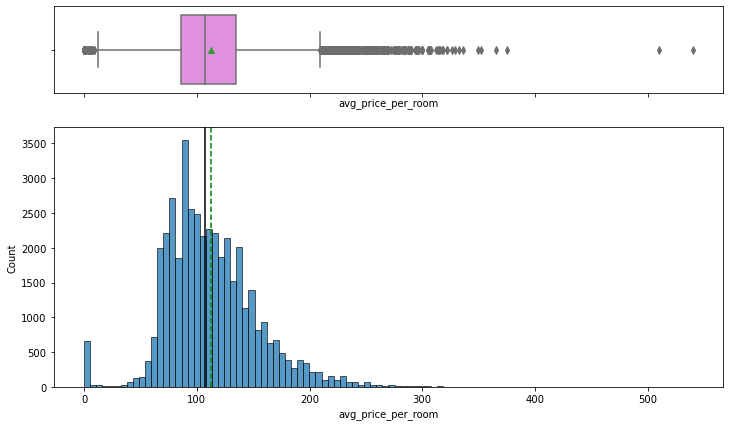

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(dfshg, "avg_price_per_room", bins=100)

#### Observations:

- Average price per room ranges from 0 to ~540.
- With mean and median close to each other the data looks close to normally distributed, however we see a spike with room price at 0 euros.
- The spike in 0 euros could be related to market segment complimentary, we will see that further.
- Data has outliers on both sides.

### Checking the no_of_adults variable

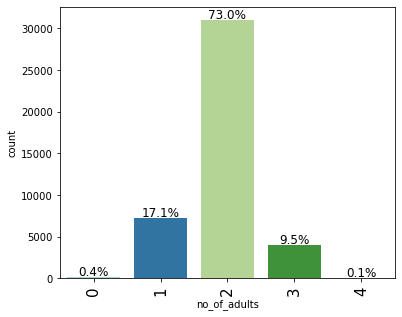

<IPython.core.display.Javascript object>

In [17]:
labeled_barplot(dfshg, "no_of_adults", perc=True)

#### Observations:

- Bookings are made for 2 adults is most popular, ~73% of bookings are done for 2 adults.
- Bookings for 4 adults are the lowest.
- Data shows there are bookings with 0 adults in room, we have to further explore the occupancy of the room.

### Exploring the no_of_children variable

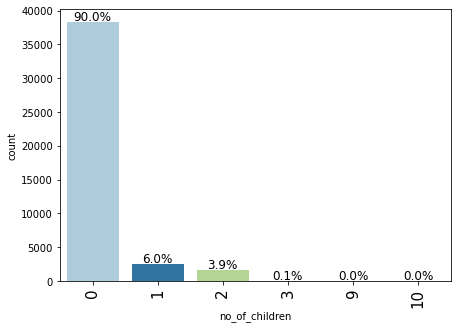

<IPython.core.display.Javascript object>

In [18]:
labeled_barplot(dfshg, "no_of_children", perc=True)

#### Observations:

- Majority of bookings are done with no children occupancy, ~90%
- There are very less bookings made for 1,2,3 children, altogether they consist the rest close to 10%
- However we can observe there are bookings which shows 9/10 as children occupancy, which in plot comes as 0% but this is due to rounding off when calculating the percentages must be because they are very less in numbers, we shall look at this data.

### Checking the bookings with 0 no_of_adults

In [19]:
dfshg[dfshg["no_of_adults"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
54,0,2,0,3,Meal Plan 1,0,Room_Type 2,56,2018,12,7,Online,0,0,0,82.44,1,Not_Canceled
191,0,2,0,1,Not Selected,0,Room_Type 1,28,2019,6,13,Online,0,0,0,109.00,2,Not_Canceled
433,0,2,2,2,Meal Plan 1,0,Room_Type 1,68,2018,4,24,Online,0,0,0,108.38,1,Canceled
1004,0,2,1,2,Meal Plan 1,0,Room_Type 2,78,2018,8,19,Online,0,0,0,115.68,1,Not_Canceled
1364,0,2,0,4,Meal Plan 1,0,Room_Type 2,310,2019,5,24,Online,0,0,0,99.45,0,Canceled
1414,0,2,2,2,Meal Plan 1,0,Room_Type 2,200,2019,3,24,Online,0,0,0,77.86,2,Canceled
1442,0,2,0,3,Meal Plan 1,0,Room_Type 2,40,2018,1,14,Online,0,0,0,6.67,1,Not_Canceled
1471,0,2,1,1,Meal Plan 1,0,Room_Type 2,92,2018,10,29,Online,0,0,0,81.50,2,Not_Canceled
2147,0,1,2,4,Meal Plan 1,0,Room_Type 2,109,2018,4,1,Online,0,0,0,73.74,1,Not_Canceled
2562,0,2,0,1,Meal Plan 1,0,Room_Type 1,130,2018,3,25,Complementary,0,0,0,6.00,2,Not_Canceled


<IPython.core.display.Javascript object>

In [20]:
print(
    "Total number of bookings with 0 adult occupancy",
    dfshg[dfshg["no_of_adults"] == 0].shape[0],
)

Total number of bookings with 0 adult occupancy 184


<IPython.core.display.Javascript object>

In [21]:
print(
    "Total number of bookings with 0 adults and 0 children",
    dfshg[(dfshg["no_of_adults"] == 0) & (dfshg["no_of_children"] == 0)].shape[0],
)

Total number of bookings with 0 adults and 0 children 0


<IPython.core.display.Javascript object>

#### Observations:

- We can observe that there are 184 bookings which shows adult occupancy as 0, but all of them as children occupancy.
- This could be for separate rooms booked for childrens, so we will still consider the bookings with 0 adults as valid bookings

### Checking on the bookings with children occupancy as 9 and 10

In [22]:
dfshg[dfshg["no_of_children"] == 9]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
15748,1,9,2,1,Meal Plan 1,0,Room_Type 1,11,2017,10,11,Corporate,0,0,0,95.0,0,Not_Canceled
15779,2,9,2,5,Meal Plan 1,0,Room_Type 2,8,2017,8,13,Online,0,0,0,76.5,1,Canceled


<IPython.core.display.Javascript object>

In [23]:
dfshg[dfshg["no_of_children"] == 10]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
9922,2,10,0,2,Meal Plan 1,0,Room_Type 4,37,2018,1,12,Online,0,0,0,84.45,1,Not_Canceled


<IPython.core.display.Javascript object>

#### Observations:

- As we have observed earlier there must be very less number of bookings which has children occupancy as 9/10.
- This confirms our intution, there are only 2 bookings with 9 children, and only 1 booking with 10 children.
- We will drop these rows prior to model building, to make our model more generalized

### Exploring the no_of_weekend_nights variable

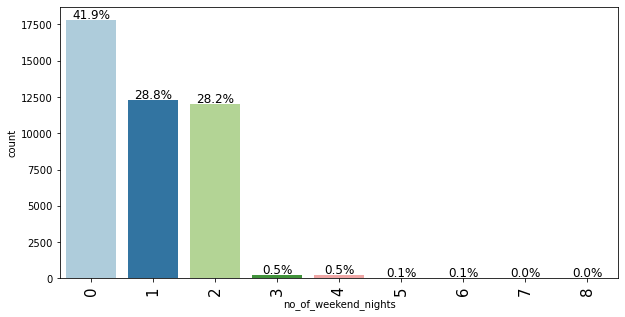

<IPython.core.display.Javascript object>

In [24]:
labeled_barplot(dfshg, "no_of_weekend_nights", perc=True)

#### Observations:

- Large no of bookings are not having any weekend nights, ~42%
- ~50% of bookings are with either one or both weekend nights.
- There are bookings with as high as 8 weekend nights, however they are very less in numbers

In [25]:
dfshg[dfshg["no_of_weekend_nights"] == 7]["booking_status"]

30676    Canceled
Name: booking_status, dtype: object

<IPython.core.display.Javascript object>

In [26]:
dfshg[dfshg["no_of_weekend_nights"] == 8]["booking_status"]

5996     Canceled
26736    Canceled
Name: booking_status, dtype: object

<IPython.core.display.Javascript object>

#### Observations:

- We can observe there are only 1 booking with 7 weekend nights and 2 with 8 weekend nights.
- All three bookings are canceled, we can't be sure but these bookings may have made on error.

### Exploring the no_of_week_nights variable

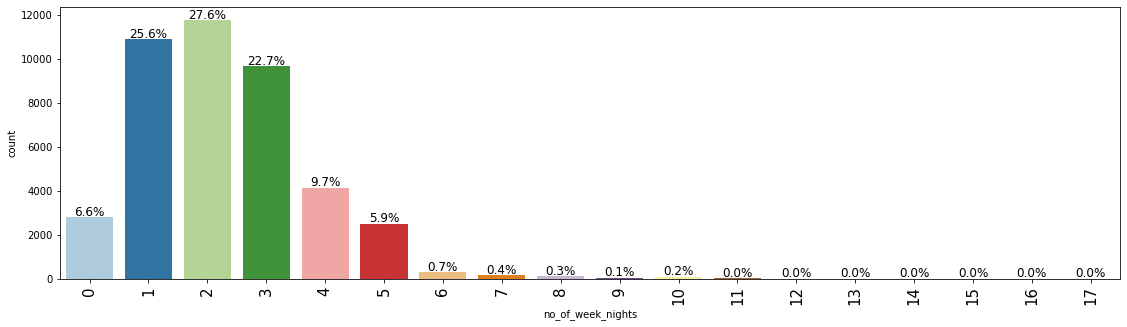

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(dfshg, "no_of_week_nights", perc=True)

#### Observations:

- ~6.6% of bookings are with weeknights as 0, we have to further see if there are any bookings with both weekend nights and week nights as 0
- Most popular bookings are with 1, 2 or 3 week nights, each are respectively ~25%, ~27%, and ~22% of total bookings

#### Let's check if there are any observations where week nights and weekend nights both are 0

In [28]:
dfshg[(dfshg["no_of_weekend_nights"] == 0) & (dfshg["no_of_week_nights"] == 0)]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
324,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
399,1,0,0,0,Meal Plan 1,0,Room_Type 1,23,2019,1,11,Online,0,0,0,0.0,2,Not_Canceled
1795,2,0,0,0,Meal Plan 1,0,Room_Type 1,145,2018,7,5,Online,0,0,0,0.0,1,Not_Canceled
2159,3,0,0,0,Meal Plan 1,0,Room_Type 4,57,2018,4,1,Online,0,0,0,0.0,2,Not_Canceled
2971,2,0,0,0,Meal Plan 2,0,Room_Type 1,247,2018,6,6,Online,0,0,0,0.0,1,Not_Canceled
3109,2,0,0,0,Meal Plan 1,0,Room_Type 1,43,2017,10,17,Online,0,0,0,0.0,1,Not_Canceled
3272,2,0,0,0,Meal Plan 1,0,Room_Type 1,12,2018,8,16,Online,0,0,0,0.0,1,Not_Canceled
3869,2,0,0,0,Not Selected,0,Room_Type 1,19,2017,12,16,Online,0,0,0,0.0,0,Not_Canceled
3927,1,0,0,0,Meal Plan 1,0,Room_Type 7,7,2018,10,10,Online,0,0,0,0.0,1,Not_Canceled
4605,2,0,0,0,Meal Plan 1,0,Room_Type 1,274,2018,11,4,Online,0,0,0,0.0,2,Not_Canceled


<IPython.core.display.Javascript object>

In [29]:
dfshg[(dfshg["no_of_weekend_nights"] == 0) & (dfshg["no_of_week_nights"] == 0)].shape[0]

99

<IPython.core.display.Javascript object>

#### Observations:

- We can see there are 99 observations which has both weekend nights and week nights as 0, which is unusual for a booking.
- We can see other than complementary the bookings are from online, and it doesn't have any average price per room, which also seems not correct.
- We will treat these as missing values and treat them as part of data preprocessing

### Exploring the type_of_meal_plan variable

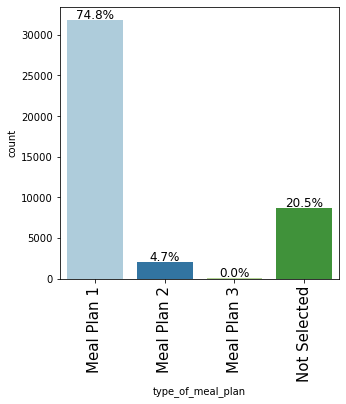

<IPython.core.display.Javascript object>

In [30]:
labeled_barplot(dfshg, "type_of_meal_plan", perc=True)

#### Observations:

- Their most popular mean plan is Meal plan 1 which is Breakfast, ~75% of bookings selected this plan.
- Meal Plan 3 is the least popular plan with very less number of bookings.
- ~20% of bookings have no meal plan selected.

In [31]:
dfshg[dfshg["type_of_meal_plan"] == "Meal Plan 3"]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
8939,2,0,0,2,Meal Plan 3,0,Room_Type 7,7,2019,3,2,Complementary,1,0,5,0.0,3,Not_Canceled
13390,2,0,0,1,Meal Plan 3,0,Room_Type 1,34,2017,9,23,Offline,0,0,0,206.0,0,Canceled
18716,2,0,1,1,Meal Plan 3,1,Room_Type 4,4,2018,1,9,Complementary,0,0,0,0.0,1,Not_Canceled
19510,2,0,0,2,Meal Plan 3,0,Room_Type 7,5,2018,3,16,Complementary,0,0,0,0.0,0,Not_Canceled
23478,2,0,0,3,Meal Plan 3,0,Room_Type 7,1,2018,6,21,Complementary,0,0,0,0.0,1,Not_Canceled
43129,2,0,0,1,Meal Plan 3,0,Room_Type 1,0,2019,3,10,Complementary,0,0,0,0.0,1,Not_Canceled
44840,2,0,0,1,Meal Plan 3,0,Room_Type 7,0,2018,4,20,Complementary,1,0,2,0.0,1,Not_Canceled
50411,2,0,0,2,Meal Plan 3,1,Room_Type 7,1,2019,2,2,Complementary,1,0,4,0.0,3,Not_Canceled


<IPython.core.display.Javascript object>

#### Observations:

- Only 8 bookings which has chosen Meal Plan 3.
- 7 out of these 8 bookings are complementary which has verage room price as 0. 

### Exploring the required_car_parking_space variable

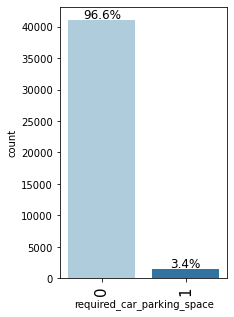

<IPython.core.display.Javascript object>

In [32]:
labeled_barplot(dfshg, "required_car_parking_space", perc=True)

#### Observations:

- We can observe parking space are not required predominantly, ~97% of bookings doesn't have any parking requirement. It make sense as most people likely use cabs for travel during vacation or work while staying in hotels

### Exploring the room_type_reserved variable

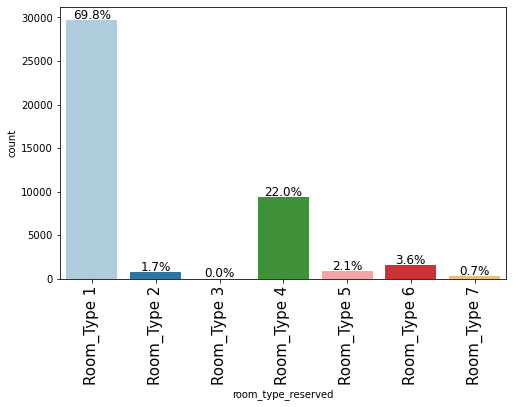

<IPython.core.display.Javascript object>

In [33]:
labeled_barplot(dfshg, "room_type_reserved", perc=True)

#### Observations:

- Room Type 1 is the most popular room, we need to further explore what makes it more preferred type.
- Second highest booked room type is Room type 4.
- Room Type 3 has the least preferred room, must be with very less bookings.

In [34]:
dfshg[dfshg["room_type_reserved"] == "Room_Type 3"]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
2620,1,0,0,1,Not Selected,0,Room_Type 3,0,2017,12,31,Complementary,0,0,0,0.00,0,Not_Canceled
6855,2,0,1,1,Meal Plan 1,0,Room_Type 3,116,2018,6,11,Online,0,0,0,80.75,0,Canceled
8636,2,0,1,2,Meal Plan 1,0,Room_Type 3,180,2018,10,10,Online,0,0,0,130.00,0,Canceled
25329,1,0,1,2,Meal Plan 1,0,Room_Type 3,66,2017,10,9,Offline,0,0,0,65.00,0,Not_Canceled
44926,2,0,0,2,Meal Plan 1,0,Room_Type 3,114,2018,10,13,Offline,0,0,0,130.00,0,Not_Canceled
48927,2,0,1,5,Meal Plan 1,0,Room_Type 3,11,2018,11,1,Corporate,0,0,0,110.00,1,Not_Canceled


<IPython.core.display.Javascript object>

#### Observations:

- There are only 6 bookings for room type 3
- This room type's price range is low to midrange category and closer to mean of average room price.
- There are no other variable to give us enough information to observe a pattern why this room type is the least chosen one.

### Exploring the lead_time variable

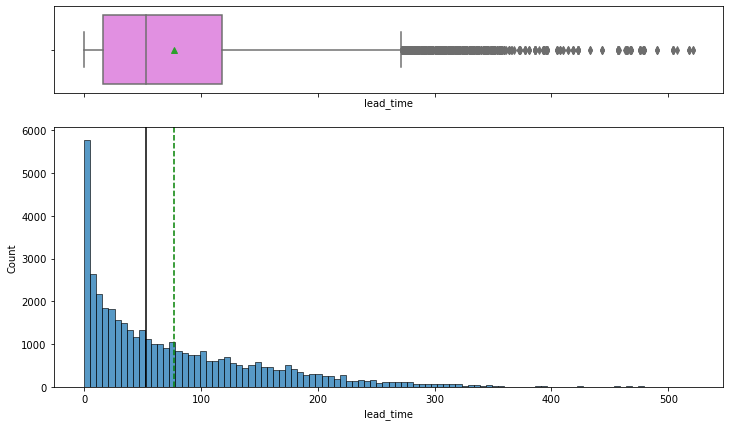

<IPython.core.display.Javascript object>

In [35]:
histogram_boxplot(dfshg, "lead_time", bins=100)

#### Observations:

- Data is heavily right skewed and with outliers to the right.
- We can observe average lead time of booking are ~2 to 3 months.

### Exploring the arrival_year variable

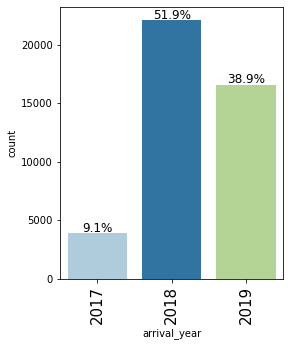

<IPython.core.display.Javascript object>

In [36]:
labeled_barplot(dfshg, "arrival_year", perc=True)

#### Observations:

- Bookings are recorded for 2017, 2018 and 2019.
- 2017 has unusually low bookings.
- 2018 has the highest booking for all the years recorded in the data
- In 2019 the bookings has reduced.

### Exploring the arrival_month variable

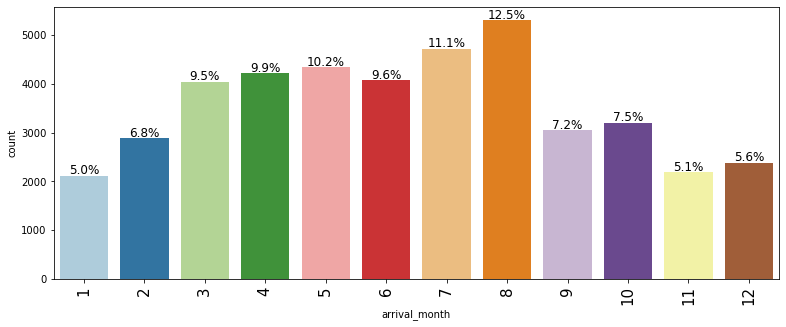

<IPython.core.display.Javascript object>

In [37]:
labeled_barplot(dfshg, "arrival_month", perc=True)

#### Observations:

- July and August seems to be the most busiest months of all.
- March to August has pretty much consistent booking than other months, this make sense as the hotel chain being in Portugal, it's more popular destination during warmer weather.

### Exploring the arrival_date variable

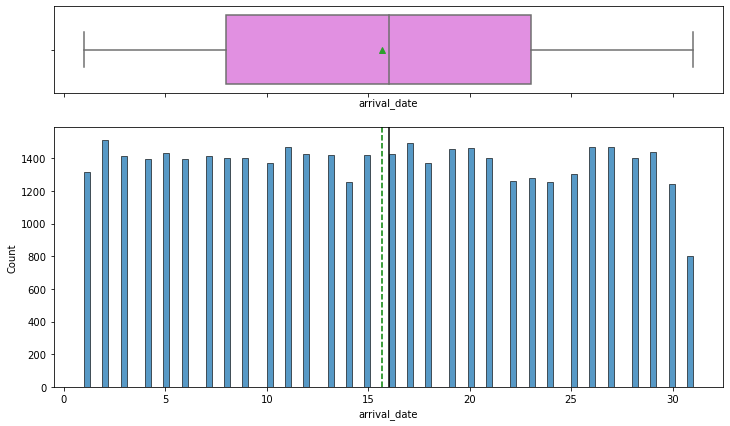

<IPython.core.display.Javascript object>

In [38]:
histogram_boxplot(dfshg, "arrival_date", bins=100)

#### Observations:

- The bookings are consistent through out the month.
- There are less number of months having 31 days and hence we can observe a drop on that day.

### Exploring the market_segment_type variable

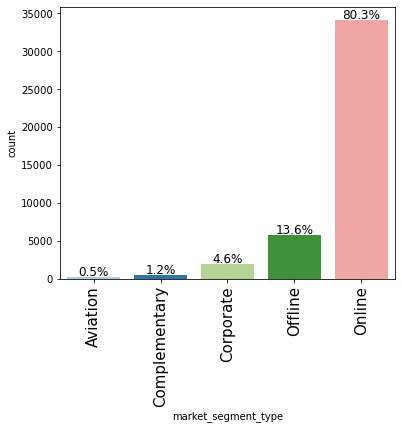

<IPython.core.display.Javascript object>

In [39]:
labeled_barplot(dfshg, "market_segment_type", perc=True)

#### Observations:

- We can observe ~80% of bookings are made online, this confirms our understanding as well
- Aviation has the lowest booking rate.
- There are ~13% of booking made offline, which is probably either by calling the hotel, or by walk in on the spot.

### Exploring the repeated_guest variable

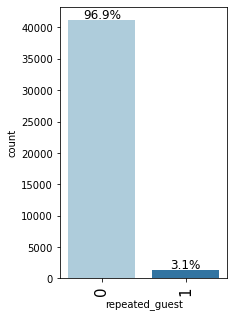

<IPython.core.display.Javascript object>

In [40]:
labeled_barplot(dfshg, "repeated_guest", perc=True)

#### Observations:

- Majority are non repeated guests, ~97%, and only ~3% guests are repeated customers

### Exploring the no_of_previous_cancellations variable

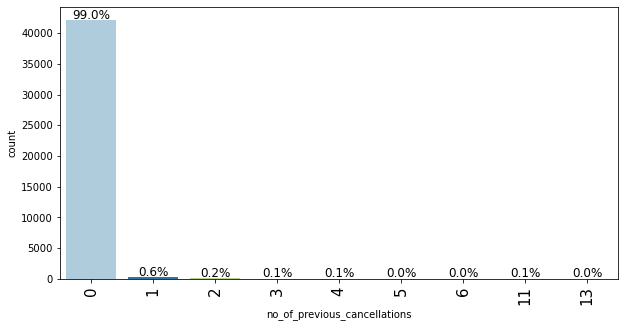

<IPython.core.display.Javascript object>

In [41]:
labeled_barplot(dfshg, "no_of_previous_cancellations", perc=True)

#### Observations:

- ~99% of guests haven't had any previous cancellations, this make sense as we observed ~97% of them are not repeated guests.
- We can observe guests have previous cancellation as high as 13 bookings.

### Exploring the no_of_previous_bookings_not_canceled variable

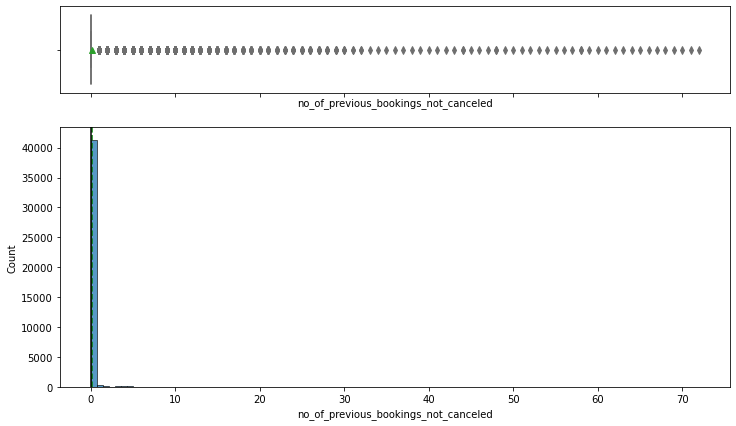

<IPython.core.display.Javascript object>

In [42]:
histogram_boxplot(dfshg, "no_of_previous_bookings_not_canceled", bins=100)

#### Observations:

- As we have observed earlier that majority are non repeated guests, hence no of previous booking not cancelled as 0 being the majority make sense.
- We can observe previous cancelled bookings are as high as > 70 bookings

### Exploring the no_of_special_requests variable

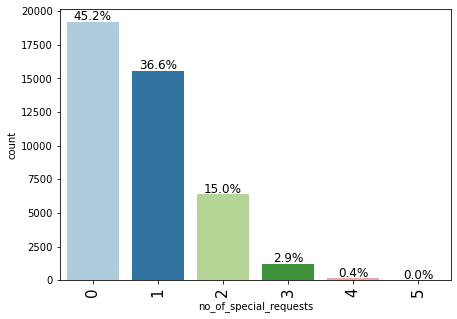

<IPython.core.display.Javascript object>

In [43]:
labeled_barplot(dfshg, "no_of_special_requests", perc=True)

#### Observations:

- ~45% guests doesn't make any special requests while booking.
- ~36% of guests makes 1 special requests.
- We can observe maximum upto 5 special requests were made. 

In [44]:
dfshg[dfshg["no_of_special_requests"] == 5]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
17,1,0,2,5,Meal Plan 1,0,Room_Type 1,219,2019,7,14,Online,0,0,0,99.10,5,Not_Canceled
2778,3,0,2,5,Meal Plan 1,0,Room_Type 4,219,2019,7,14,Online,0,0,0,156.60,5,Not_Canceled
3180,2,0,2,2,Not Selected,0,Room_Type 1,207,2019,6,24,Online,0,0,0,99.00,5,Not_Canceled
4957,2,0,2,3,Meal Plan 1,0,Room_Type 1,46,2018,11,18,Online,0,0,0,68.07,5,Not_Canceled
5486,3,0,1,2,Meal Plan 1,0,Room_Type 6,3,2018,9,26,Online,0,0,0,266.67,5,Not_Canceled
6700,2,0,0,3,Meal Plan 1,0,Room_Type 1,30,2017,10,14,Online,0,0,0,96.30,5,Not_Canceled
9474,2,0,1,3,Meal Plan 1,0,Room_Type 1,105,2018,9,29,Offline,0,0,0,96.90,5,Not_Canceled
11105,2,0,1,2,Meal Plan 1,0,Room_Type 4,23,2018,11,11,Online,0,0,0,124.67,5,Not_Canceled
16494,2,0,1,4,Not Selected,0,Room_Type 1,120,2019,4,17,Online,0,0,0,108.00,5,Not_Canceled
16663,2,0,1,2,Meal Plan 1,0,Room_Type 1,36,2019,4,10,Online,0,0,0,140.00,5,Not_Canceled


<IPython.core.display.Javascript object>

In [45]:
print(
    "Total number of bookings which has special requests as 5 is ",
    dfshg[dfshg["no_of_special_requests"] == 5].shape[0],
)

Total number of bookings which has special requests as 5 is  16


<IPython.core.display.Javascript object>

#### Observations:

- There are total 16 bookings which are made with 5 special requests.
- All of them are from Online and none of these are cancelled.

### Exploring the booking_status variable

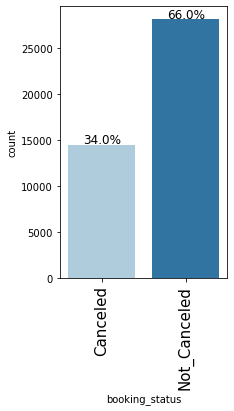

<IPython.core.display.Javascript object>

In [46]:
labeled_barplot(dfshg, "booking_status", perc=True)

#### Observations:

- We can observe ~34% of bookings are being cancelled.
- 66% bookings are made and not cancelled.

## Bivariate Analysis

### Market Segment vs Average Room Price

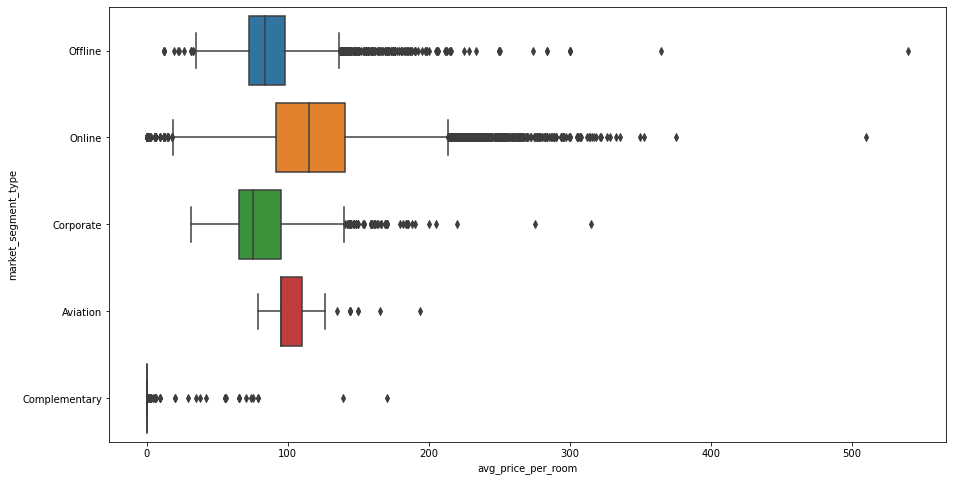

<IPython.core.display.Javascript object>

In [47]:
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.boxplot(dfshg["avg_price_per_room"], dfshg["market_segment_type"], orient="h")
plt.show()

#### Observations:

- We can observe that average room price do vary based on market segmentation.
- Online has the highest average room price.
- Corporate gets the lowest average room price other than complementary which has room price always as 0. 

### Repeated Guests vs Booking Status

In [48]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 100)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                14487         28089  42576
0                  14477         26784  41261
1                     10          1305   1315
----------------------------------------------------------------------------------------------------


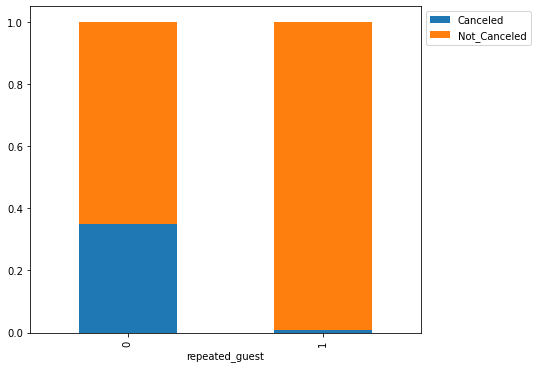

<IPython.core.display.Javascript object>

In [49]:
stacked_barplot(dfshg, "repeated_guest", "booking_status")

#### Observations:

- We can observe the cancellation rate among repeated guests(denoted as 1) is very less compared to new guests 

### No of Special requests vs Booking Status

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        14487         28089  42576
0                           8752         10476  19228
1                           4346         11225  15571
2                           1389          4992   6381
3                              0          1230   1230
4                              0           150    150
5                              0            16     16
----------------------------------------------------------------------------------------------------


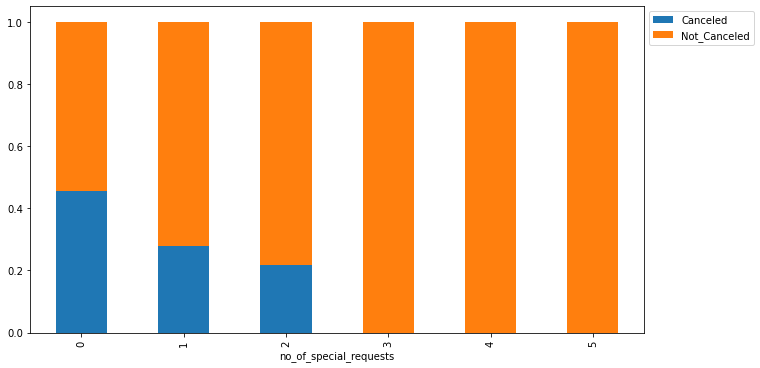

<IPython.core.display.Javascript object>

In [50]:
stacked_barplot(dfshg, "no_of_special_requests", "booking_status")

#### Observations:

- We can observe bookings with more no of special requests made by guests are more likely not to cancel the bookings.
- Where as when no special requests are made the cancellation rate is close to ~50%

### Market Segment vs Booking Status

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     14487         28089  42576
Online                  13483         20686  34169
Offline                   804          4973   5777
Corporate                 167          1772   1939
Aviation                   33           162    195
Complementary               0           496    496
----------------------------------------------------------------------------------------------------


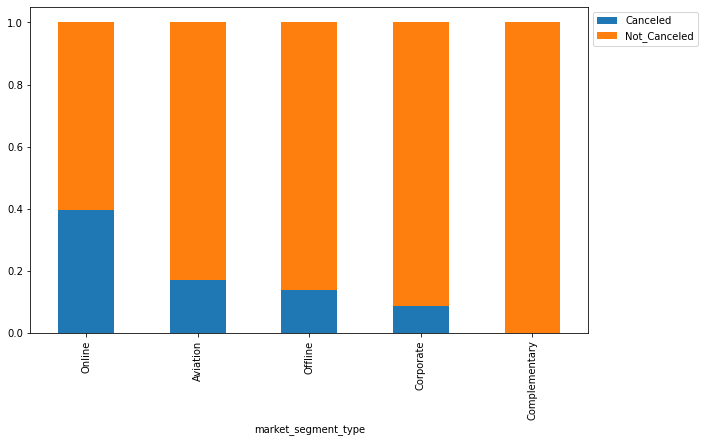

<IPython.core.display.Javascript object>

In [51]:
stacked_barplot(dfshg, "market_segment_type", "booking_status")

#### Observations:

- We don't see any cancellations on the complementary bookings, which makes sense.
- Corporate bookings are also cancelled very less.
- Online bookings have highest cancellation rate.

### Lead time vs Average room price

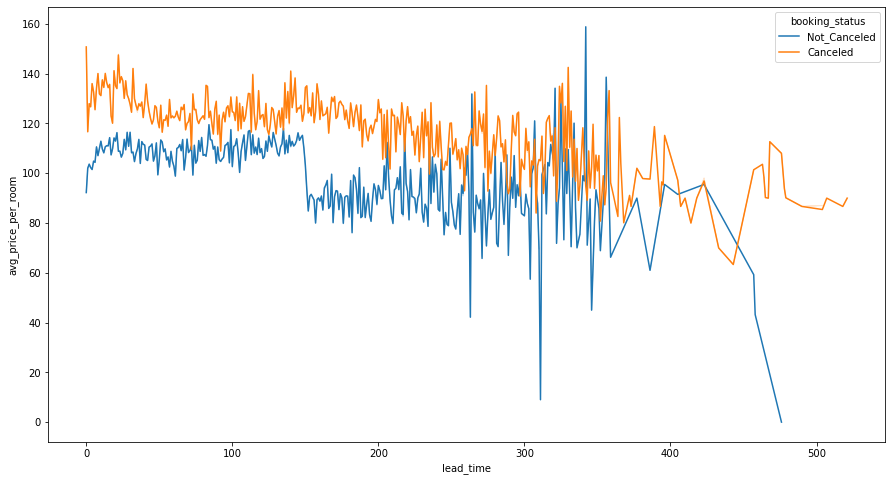

<IPython.core.display.Javascript object>

In [52]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(
    x="lead_time", y="avg_price_per_room", data=dfshg, ci=0, hue="booking_status"
)
plt.show()

#### Observations:

- With less booking lead time the average room price is higher, and as the lead time increase the average price per room gets lower.
- We can observe for most cancelled bookings the average room price is higher than the non cancelled bookings.

### Lead time vs Booking status

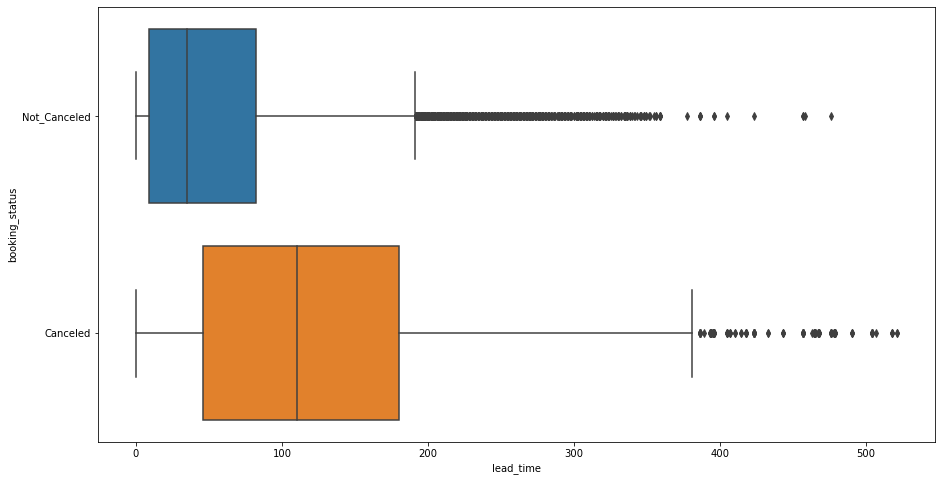

<IPython.core.display.Javascript object>

In [53]:
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.boxplot(dfshg["lead_time"], dfshg["booking_status"], orient="h")
plt.show()

#### Observations:

- We can observe for the cancelled and not cancelled there is a clear difference on the mean lead time, and the range of majority lead time.
- Average lead time for cancelled booking is higher than not cancelled bookings.
- Bookings which are made close to arrival date are not likely to be cancelled

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### Missing value Treatment

- As we have observed earlier there are no null vallues present, however the bookings where week nights and weekened nights both are 0 we will treat those as missing values and will treat them with mode value of particular market segment the bookings belongs to.
- We have also noticed for these bookings the average room price is 0, we are considering this as missing values and will replace with median of particular market segment type

#### Let's quickly check the bookings which has the hidden missing values as described above

In [54]:
dfshg_missing_nights = dfshg[
    (dfshg["no_of_weekend_nights"] == 0) & (dfshg["no_of_week_nights"] == 0)
]
dfshg_missing_nights

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
324,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
399,1,0,0,0,Meal Plan 1,0,Room_Type 1,23,2019,1,11,Online,0,0,0,0.0,2,Not_Canceled
1795,2,0,0,0,Meal Plan 1,0,Room_Type 1,145,2018,7,5,Online,0,0,0,0.0,1,Not_Canceled
2159,3,0,0,0,Meal Plan 1,0,Room_Type 4,57,2018,4,1,Online,0,0,0,0.0,2,Not_Canceled
2971,2,0,0,0,Meal Plan 2,0,Room_Type 1,247,2018,6,6,Online,0,0,0,0.0,1,Not_Canceled
3109,2,0,0,0,Meal Plan 1,0,Room_Type 1,43,2017,10,17,Online,0,0,0,0.0,1,Not_Canceled
3272,2,0,0,0,Meal Plan 1,0,Room_Type 1,12,2018,8,16,Online,0,0,0,0.0,1,Not_Canceled
3869,2,0,0,0,Not Selected,0,Room_Type 1,19,2017,12,16,Online,0,0,0,0.0,0,Not_Canceled
3927,1,0,0,0,Meal Plan 1,0,Room_Type 7,7,2018,10,10,Online,0,0,0,0.0,1,Not_Canceled
4605,2,0,0,0,Meal Plan 1,0,Room_Type 1,274,2018,11,4,Online,0,0,0,0.0,2,Not_Canceled


<IPython.core.display.Javascript object>

#### Check what are the different market segments for these data

In [55]:
dfshg_missing_nights["market_segment_type"].value_counts()

Online           83
Complementary    16
Name: market_segment_type, dtype: int64

<IPython.core.display.Javascript object>

#### Check the average room price for these bookings

In [56]:
dfshg_missing_nights["avg_price_per_room"].value_counts()

0.0    99
Name: avg_price_per_room, dtype: int64

<IPython.core.display.Javascript object>

   **All 99 records are having average room price as 0, while for complementary booking it is ok, for the online bookings these are not correct**

#### Let's treat the average room price for Online bookings where week nights and weekend nights are 0

In [57]:
# Calculate median for average room price for market segment Online
online_median = dfshg[dfshg["market_segment_type"] == "Online"][
    "avg_price_per_room"
].median()
online_median

115.0

<IPython.core.display.Javascript object>

In [58]:
# Updating the average room price for Online bookings where week nights and weekend nights both are zero
dfshg.loc[
    (dfshg["no_of_weekend_nights"] == 0)
    & (dfshg["no_of_week_nights"] == 0)
    & (dfshg["market_segment_type"] == "Online"),
    "avg_price_per_room",
] = online_median

<IPython.core.display.Javascript object>

In [59]:
# Calculate mode for week nights for market segmet Online and Complementary
mode_wk_nght_online = dfshg[dfshg["market_segment_type"] == "Online"][
    "no_of_week_nights"
].mode()
mode_wk_nght_cmpl = dfshg[dfshg["market_segment_type"] == "Complementary"][
    "no_of_week_nights"
].mode()
# Calculate mode for weekend nights for market segmet Online and Complementary
mode_wknd_nght_online = dfshg[dfshg["market_segment_type"] == "Online"][
    "no_of_weekend_nights"
].mode()
mode_wknd_nght_cmpl = dfshg[dfshg["market_segment_type"] == "Complementary"][
    "no_of_weekend_nights"
].mode()
print("mode_wk_nght_online", mode_wk_nght_online)
print("mode_wk_nght_cmpl", mode_wk_nght_cmpl)
print("mode_wknd_nght_online", mode_wknd_nght_online)
print("mode_wknd_nght_cmpl", mode_wknd_nght_cmpl)

mode_wk_nght_online 0    2
dtype: int64
mode_wk_nght_cmpl 0    1
dtype: int64
mode_wknd_nght_online 0    0
dtype: int64
mode_wknd_nght_cmpl 0    0
dtype: int64


<IPython.core.display.Javascript object>

#### Observations:

- Mode for week nights for Online and Complementary is 2 and 1, we will update the missing values for the bookings where both week nights and weekend nights are 0
- For weekend nights the mode is coming as 0 for both market segments hence we will not replace and keep it what it is.

In [60]:
# Updating the week nights for Online and Complementary bookings where week nights and weekend nights both are zero
dfshg.loc[
    (dfshg["no_of_weekend_nights"] == 0)
    & (dfshg["no_of_week_nights"] == 0)
    & (dfshg["market_segment_type"] == "Online"),
    "no_of_week_nights",
] = int(mode_wk_nght_online)
dfshg.loc[
    (dfshg["no_of_weekend_nights"] == 0)
    & (dfshg["no_of_week_nights"] == 0)
    & (dfshg["market_segment_type"] == "Complementary"),
    "no_of_week_nights",
] = int(mode_wk_nght_cmpl)

<IPython.core.display.Javascript object>

#### Let's confirm all the bookings we considered have missing values updated

In [61]:
dfshg[(dfshg["no_of_weekend_nights"] == 0) & (dfshg["no_of_week_nights"] == 0)]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


<IPython.core.display.Javascript object>

#### Observations:

- We can observe we do not have any more bookings with week nights and weekend nights both as 0

### Outlier detection and treatment

- Except **avg_price_per_room** we have observed all other features are discreet in nature, so we are only going to do treat outliers of this feature alone.

#### Let's quickly visualize the outliers as we have observed earlier for the feature avg_price_per_room

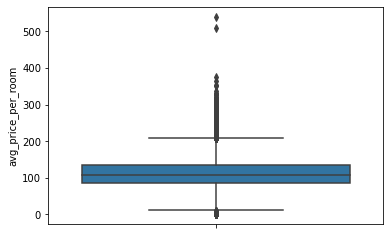

<IPython.core.display.Javascript object>

In [62]:
sns.boxplot(y=dfshg["avg_price_per_room"], orient="v", whis=1.5)
plt.show()

#### Observations:

- We can observe we have outliers in both upper and lower sides of the data.
- This outliers are detected with whiskers as 1.5, however since the lower side data also considered as outliers, which we should not treat, as we know there are bookings which are complimentary and have 0 as avg room price, it should remain same.
- Let's observe if changing whisker should eliminate lower outliers

#### Changing whisker to 3 and re-check outliers

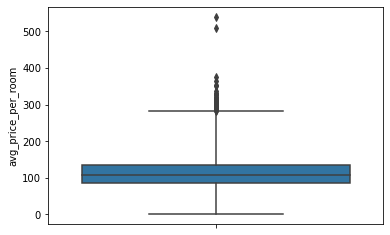

<IPython.core.display.Javascript object>

In [63]:
sns.boxplot(y=dfshg["avg_price_per_room"], orient="v", whis=3)
plt.show()

#### Observations:

- We can observe changing whisker to 3 eliminates the lower outliers and hence we will treat the upper outiers using whisker as 3

#### Treating outliers for avg_price_per_room

In [64]:
Q1 = dfshg["avg_price_per_room"].quantile(0.25)  # 25th quantile
Q3 = dfshg["avg_price_per_room"].quantile(0.75)  # 75th quantile
IQR = Q3 - Q1
Lower_Whisker = Q1 - 3 * IQR
Upper_Whisker = Q3 + 3 * IQR

# all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
# all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
dfshg["avg_price_per_room"] = np.clip(
    dfshg["avg_price_per_room"], Lower_Whisker, Upper_Whisker
)

<IPython.core.display.Javascript object>

#### Let's now check if we have treated the outliers

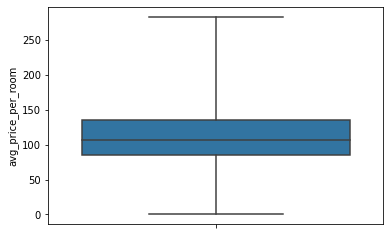

<IPython.core.display.Javascript object>

In [65]:
sns.boxplot(y=dfshg["avg_price_per_room"], orient="v", whis=3)
plt.show()

#### Observations:

- We can observe that we have successfully treated all the outliers of this feature.

### Feature Engineering

- Based on the presented features, we plan to add two new features and will observe if they will add value while model creation.
  - 1. **stay_duration** - this feature will be created and represent total no of days, which is sum of week nights and weekend nights
  - 2. **net_cancelled** - this feature will be created and represent if a guest who has previous cancellation and previous not cancelled bookings, if the previous not cancelled is greater than previuos cancelled then 0, or else 1

#### Adding new feature stay_duration

In [66]:
dfshg["stay_duration"] = (
    dfshg["no_of_weekend_nights"] + dfshg["no_of_week_nights"]
)  # new feature will create summing up the other two features
dfshg[["no_of_weekend_nights", "no_of_week_nights", "stay_duration"]].head()

,no_of_weekend_nights,no_of_week_nights,stay_duration
0,1,2,3
1,2,3,5
2,2,1,3
3,0,2,2
4,0,3,3


<IPython.core.display.Javascript object>

#### Observations:

- We can observe the new feature has been succesfully added and values represent the total of two features weekend nights and week nights

#### Adding new feature net_cancelled

In [67]:
# Checking if we actually have any row where previous cancellation is more than previous bookings
dfshg[
    dfshg["no_of_previous_cancellations"]
    > dfshg["no_of_previous_bookings_not_canceled"]
].shape

(76, 19)

<IPython.core.display.Javascript object>

In [68]:
dfshg["net_cancelled"] = 0  # creating the feature with defaut value as 0
dfshg.loc[
    dfshg["no_of_previous_cancellations"]
    > dfshg["no_of_previous_bookings_not_canceled"],
    "net_cancelled",
] = 1  # updating the new feature value if for a particular row no of previous cancellation is greater than no of not cancelled bookings
dfshg[dfshg["net_cancelled"] > 0].shape

(76, 20)

<IPython.core.display.Javascript object>

In [69]:
dfshg["net_cancelled"].sample(10, random_state=42)

18469    0
28961    0
10871    0
6269     0
47504    0
48838    0
49094    0
8494     0
41272    0
29451    0
Name: net_cancelled, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:

- As we can observe we have 76 bookings where guests have cancelled more previous bookings than they have previous succesful bookings.
- After adding the features we can see we have succesfully have the values as 0 and 1 for those 76 bookings

### Convert booking_status to numeric value than text

- Cancelled will be converted to 0 and Not_Cancelled will be 1 to prepare our target variable for model

In [70]:
dfshg["booking_status"] = dfshg["booking_status"].replace(
    {"Canceled": 0, "Not_Canceled": 1}
)  # updating the values in booking status feature
dfshg.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,stay_duration,net_cancelled
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,1,3,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,1,5,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,0,3,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,0,2,0
4,3,0,0,3,Not Selected,0,Room_Type 1,277,2019,7,13,Online,0,0,0,89.10,2,0,3,0


<IPython.core.display.Javascript object>

## EDA Contd....

#### Let's take a backup of data after data preprocessing

In [71]:
dfshg_bkup_afdpp = dfshg.copy()

<IPython.core.display.Javascript object>

### Let's check the booking status proportions as we have converted the values

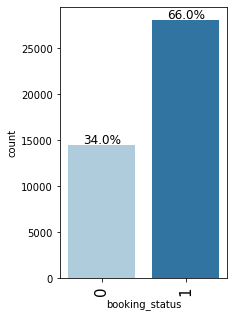

<IPython.core.display.Javascript object>

In [72]:
labeled_barplot(dfshg, "booking_status", perc=True)

#### Observations:

- We can see after the values are converted we still have the same proportions observed earlier Cancelled(0) 34% and Not Cancelled(1) 66% 

### Let's check the new feature stay_duration we have created

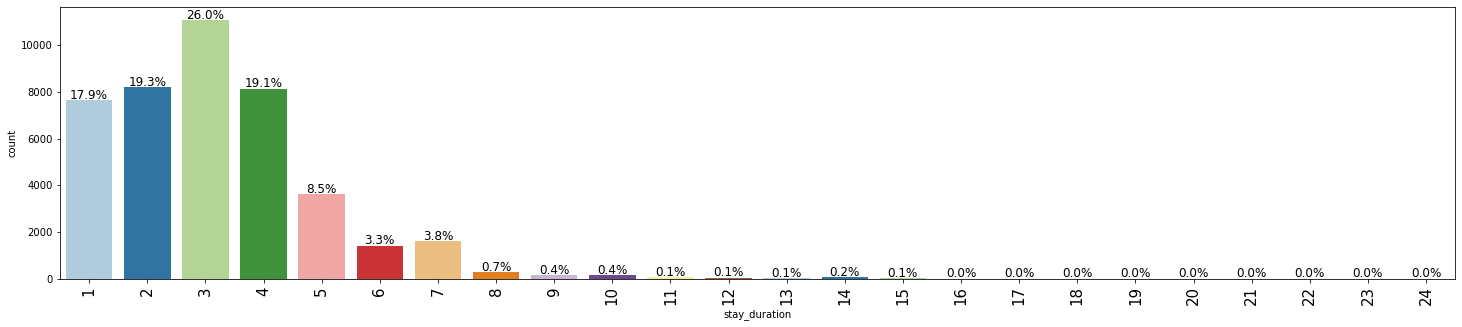

<IPython.core.display.Javascript object>

In [73]:
labeled_barplot(dfshg, "stay_duration", perc=True)

#### Observations:

- Guests have made bookings ranges from 1 to 24 days.
- ~80% of bookings are for 1 to 4 days of stays.
- 3 days stay is the most popular booking. 

### Let's check the other newly created feature net_cancelled

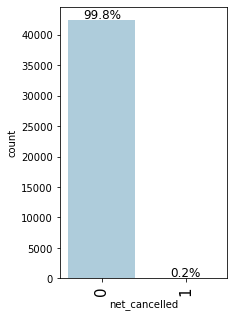

<IPython.core.display.Javascript object>

In [74]:
labeled_barplot(dfshg, "net_cancelled", perc=True)

#### Observations:

- There are only ~.2% of guests who has cancelled their bookings more than the bookings they have not cancelled.

### Let's check the correlation of the variables

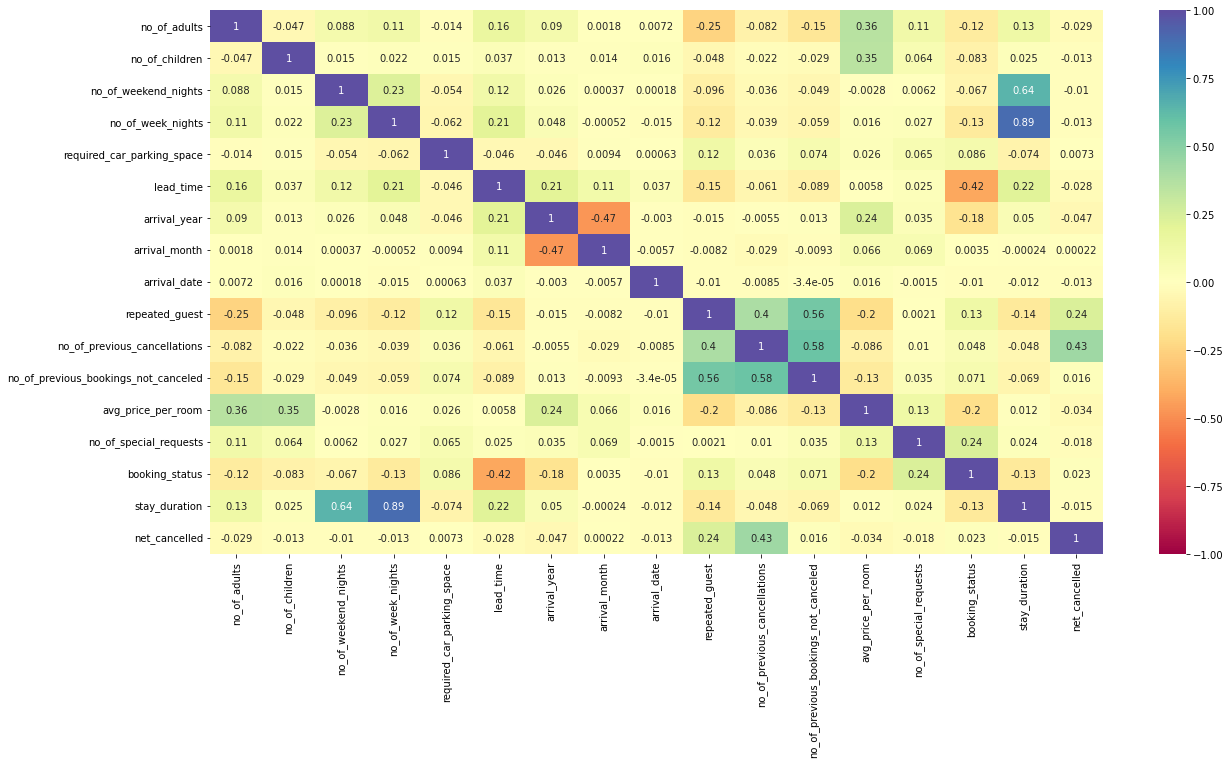

<IPython.core.display.Javascript object>

In [75]:
plt.figure(figsize=(20, 10))
sns.heatmap(dfshg.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

#### Observations:

- no of weekend nights and no of week nights shows high correlation with the newly derived feature, which make sense since it's derived from them. We will keep it for model creation and then drop based on relevance.
- None of the features shows high correlation with booking status, except lead_time shows average negative correlation with booking status
- no of previous booking not canceled shows average positive correlation with repeated guests and no of previous cancellation, .56, .58 respectively

### Let's revisit the key questions which we have previously explored

- Below key questions were previously explored under univariate and bivariate analysis let's revisit them and answer 

**Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. What percentage of repeating guests cancel?
6. Does special requirements affect booking cancellation?

### Busiest month of the hotel

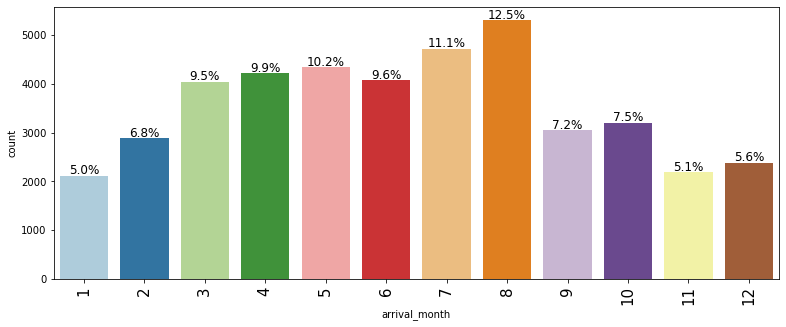

<IPython.core.display.Javascript object>

In [76]:
labeled_barplot(dfshg, "arrival_month", perc=True)

#### Observations:

- **August** (8) is the busiest month 

### Most Guests are from which Market segment

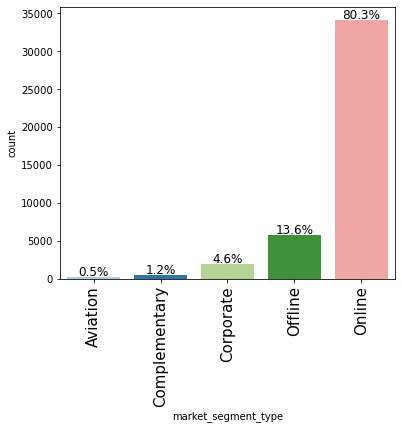

<IPython.core.display.Javascript object>

In [77]:
labeled_barplot(dfshg, "market_segment_type", perc=True)

#### Observations:

- Most guests are from market segment **Online** ~80%

### Room price differences based on Market segment

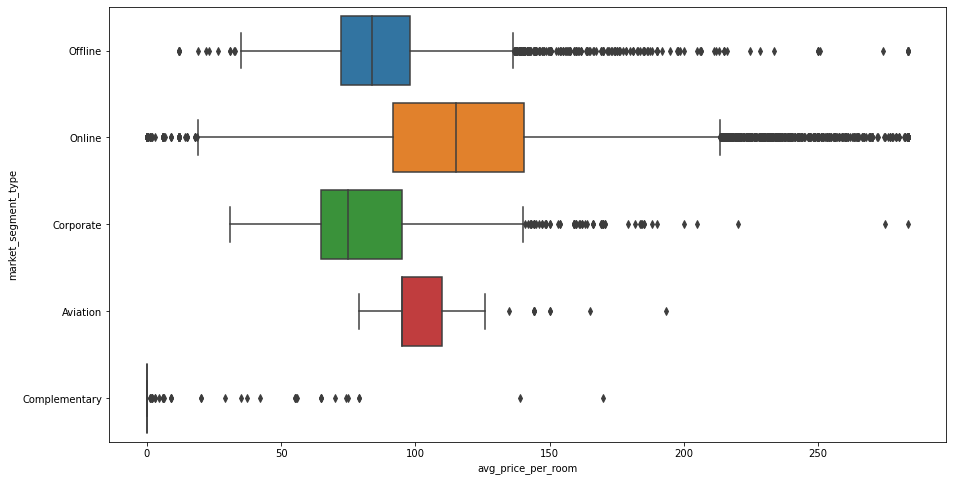

<IPython.core.display.Javascript object>

In [78]:
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.boxplot(dfshg["avg_price_per_room"], dfshg["market_segment_type"], orient="h")
plt.show()

#### Observations:

- Room prices does vary based on market segments -
    - Online shows the highest average room price.
    - Corporate has the lowest average room price.

### Percentages of bookings which are cancelled.

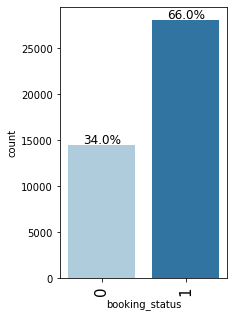

<IPython.core.display.Javascript object>

In [79]:
labeled_barplot(dfshg, "booking_status", perc=True)

#### Observations:

- **34%** of bookings are cancelled

### Percentage of cancellation among repeated guests

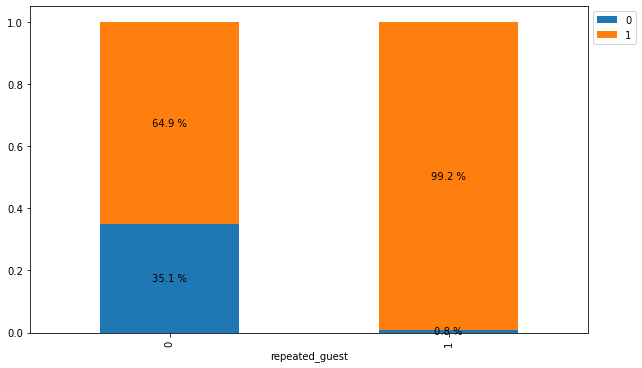

<IPython.core.display.Javascript object>

In [80]:
sorter = dfshg["booking_status"].value_counts().index[-1]
tab2 = pd.crosstab(
    dfshg["repeated_guest"], dfshg["booking_status"], normalize="index"
).sort_values(by=sorter, ascending=False)
# fig, ax = plt.subplots(figsize=(10, 6))
ax = tab2.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.legend(
    loc="lower left", frameon=False,
)
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + height / 2
    ax.text(
        x,
        y,
        "{:.1f} %".format(height * 100),
        horizontalalignment="center",
        verticalalignment="center",
    )
plt.show()

#### Observations:

- Here 0 represents Not cancelled and 1 represents Cancelled for booking status, and for repeated guests 0 represents non repeated guests and 1 as repeated guests.
- We can see only .8% of repeated guests cancels their bookings

### Does special requirements affect booking cancellation?

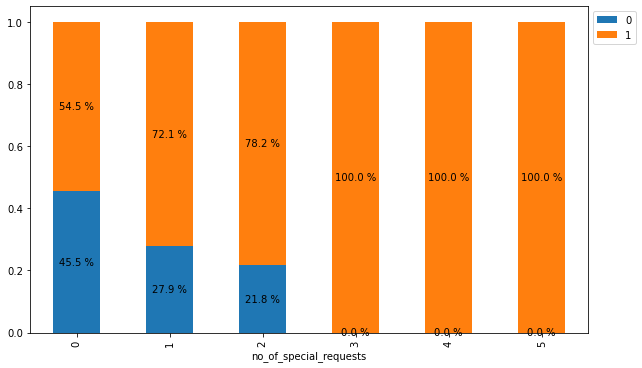

<IPython.core.display.Javascript object>

In [81]:
sorter = dfshg["booking_status"].value_counts().index[-1]
tab2 = pd.crosstab(
    dfshg["no_of_special_requests"], dfshg["booking_status"], normalize="index"
).sort_values(by=sorter, ascending=False)
# fig, ax = plt.subplots(figsize=(10, 6))
ax = tab2.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.legend(
    loc="lower left", frameon=False,
)
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + height / 2
    ax.text(
        x,
        y,
        "{:.1f} %".format(height * 100),
        horizontalalignment="center",
        verticalalignment="center",
    )
plt.show()

#### Observations:

- Though we haven't seen much high correlation between booking status and special requests, but from the above chart we can observe
    - That with higher number(>3) of special requests there are no cancellations (denoted by 1)
    - Where as if there are no special requests the cancellation (denoted by 0) is ~45%

## Summary on EDA

**Data Description:**

* Dependent variable is the booking_status which is of categorical data type.
* avg_price_per_room is continuous in nature, and loaded as float, which looks correct
* All other numerical columns are loaded as int, they are as per our understanding from the data definition provided and discreet in nature. There are total 13 columns as such. 
* meal type, market segment, room type these are the three categorical independent variables
* There are no missing/null values in the dataset.

**Data Cleaning:**

* We observed some bookings have 0 nights for weekend and weekdays both, we have considered their market segment and impute with mode of the variable based on market segment.
* We also have noticed for some of these non complementary bookings average room price is 0, and imputed them with median of the variable for the market segment 
* We have noticed there outliers in average room price and treated them, 1.5 whisker was not correct as it would have changed the average room price of complementary bookings, we noticed whisker as 3 worked better and we have used this to treat outliers.
* We have created two new features as net_cancelled which represents if a guests has more previous booking cancelled than not cancelled.
* The other feature we have created is stay duration which represents total no of days for the booking by combining weekend and week day nights

**Observations from EDA:**

* ~73% bookings are made for 2 adults, booking for 4 adults are the lowest.
* ~90% of bookings are made where there are no children occupancy, however there are bookings only with children occupancy, which can be separate booking made for accompanying adults which is not possible to identify with the data available
* There are bookings with children occupancy as 9 and 10 however they are only 2 and 1 respectively
* ~42% of bookings are made for weekdays, ~50% of bookings are atleast with 1/2 weekend nights.
* We can observe there are only 1 booking with 7 weekend nights and 2 with 8 weekend nights.
* Only ~6.6% bookings are not having any weeknights.
* Most popular bookings are with 1, 2 or 3 week nights, each are respectively ~25%, ~27%, and ~22% of total bookings
* Their most popular mean plan is Meal plan 1 which is Breakfast, ~75% of bookings selected this plan.
* ~97% of bookings doesn't have any parking requirement.
* Room Type 1 is the most popular room.
* We can observe average lead time of booking are ~2 to 3 months.
* July and August seems to be the most busiest months of all.
* March to August has pretty much consistent booking than other months.
* We can observe ~80% of bookings are made online, this confirms our understanding as well.
* Majority are non repeated guests, ~97%, and only ~3% guests are repeated customers
* ~99% of guests haven't had any previous cancellations, this make sense as we observed ~97% of them are not repeated guests.
* ~45% guests doesn't make any special requests while booking.
* Online has the highest average room price.
* Corporate gets the lowest average room price other than complementary which has room price always as 0.
* We can observe the cancellation rate among repeated guests is very less compared to new guests.
* We can observe bookings with more no of special requests made by guests are more likely not to cancel the bookings.
* Where as when no special requests are made the cancellation rate is close to ~50%
* We don't see any cancellations on the complementary bookings, which makes sense.
* Corporate bookings are also cancelled very less.
* Online bookings have highest cancellation rate.

## Data Preprocessing contd..

### Preparing data for modeling

In [82]:
# List of columns for creating dummy
cols_for_dummy = dfshg.select_dtypes(include="object").columns
cols_for_dummy

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], dtype='object')

<IPython.core.display.Javascript object>

In [83]:
# creating dummy varibles
dfshg_dummy = pd.get_dummies(dfshg, columns=cols_for_dummy, drop_first=True,)
dfshg_dummy.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,stay_duration,net_cancelled,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1,1,5,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3,0,0,3,0,277,2019,7,13,0,0,0,89.10,2,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1


<IPython.core.display.Javascript object>

### Split Data

In [84]:
dfshg_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42576 entries, 0 to 56924
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          42576 non-null  int64  
 1   no_of_children                        42576 non-null  int64  
 2   no_of_weekend_nights                  42576 non-null  int64  
 3   no_of_week_nights                     42576 non-null  int64  
 4   required_car_parking_space            42576 non-null  int64  
 5   lead_time                             42576 non-null  int64  
 6   arrival_year                          42576 non-null  int64  
 7   arrival_month                         42576 non-null  int64  
 8   arrival_date                          42576 non-null  int64  
 9   repeated_guest                        42576 non-null  int64  
 10  no_of_previous_cancellations          42576 non-null  int64  
 11  no_of_previous_

<IPython.core.display.Javascript object>

In [85]:
x = dfshg_dummy.drop("booking_status", axis=1)  # getting features
y = dfshg_dummy["booking_status"]  # getting target variable

<IPython.core.display.Javascript object>

In [86]:
# adding constant
x = sm.add_constant(x)

<IPython.core.display.Javascript object>

In [87]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)
print(X_train.shape, X_test.shape)

(29803, 30) (12773, 30)


<IPython.core.display.Javascript object>

In [88]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 29803
Number of rows in test data = 12773


<IPython.core.display.Javascript object>

In [89]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
1    0.660202
0    0.339798
Name: booking_status, dtype: float64
Percentage of classes in test set:
1    0.658655
0    0.341345
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

**Observations:**

- We have created dummy columns for all the object columns
- Split the data in 70/30 ratio for train and test set, also split separate the target/label column
- We can observe the train and test set has close proportions for our train and test set

## Model Creation

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a booking will be cancelled but in reality the booking would not be cancelled. - Loss of resources

2. Predicting a booking will not be cancelled in reality the would be cancelled. - Loss of revenue

### Which case is more important? 

* If we predict a booking will not be cancelled but in reality it will be cancelled, this is more important as business will loss revenue in this case 

### How to reduce this loss i.e need to reduce False Negatives?
*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [90]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [91]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Building a Logistic Regression model

In [92]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29774
Method:                           MLE   Df Model:                           28
Date:                Fri, 17 Sep 2021   Pseudo R-squ.:                  0.3298
Time:                        14:45:24   Log-Likelihood:                -12802.
converged:                      False   LL-Null:                       -19101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  -86.3154     68.533     -1.259      0.208    -220.637      48.007
no_of_adults                             0.0414      

<IPython.core.display.Javascript object>

**Observations**

- Negative values of the coefficient shows that probability of booking being cancelled decreases with the increase of corresponding attribute value. We currently have market segment type online, reserved room type 3, mean plan 3, stay duration, net cancelled, previous cancellations, average room price, lead time, no of child, no of week and weekend nights features for which chances of booking being cancelled decreases with increase each of these factors considering all other features remain same.

- Positive values of the coefficient show that that probability of booking being cancelled increases with the increase of corresponding attribute value. We have no of adults, car parking required, arrival year, month, date, repeated guests, no of previous booking not cancelled, special requests, meal plan2, some room types, some market segments features for which chances of booking being cancelled increases with increase each of these factors considering all other features remain same.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant. We can observe some features shows very high p-value.

- But these variables might contain multicollinearity, which will affect the p-values.

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values using variance inflation factor

## Model performance evaluation

In [93]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.792974,0.883767,0.81746,0.849321


<IPython.core.display.Javascript object>

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [94]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                   1.861464e+07
no_of_adults                            1.439820e+00
no_of_children                          2.101977e+00
no_of_weekend_nights                             inf
no_of_week_nights                                inf
required_car_parking_space              1.036899e+00
lead_time                               1.324633e+00
arrival_year                            1.787492e+00
arrival_month                           1.547929e+00
arrival_date                            1.004932e+00
repeated_guest                          2.147382e+00
no_of_previous_cancellations            2.147334e+00
no_of_previous_bookings_not_canceled    2.192240e+00
avg_price_per_room                      2.656880e+00
no_of_special_requests                  1.109966e+00
stay_duration                                    inf
net_cancelled                           1.568496e+00
type_of_meal_plan_Meal Plan 2           1.095550e+00
type_of_mea

<IPython.core.display.Javascript object>

#### Observations:

- We can see there are some features with very high vif. We should remove them one by one until all features are having low vif.
- no of week and weekend nights, stay duration vif shows as inf, we will drop stay_duration a derived feature first and see how it affects the correlation among other variables
- Market segment type, corporate, offline, online also exhibit high multicollinearity

#### Dropping stay_duration

In [95]:
X_train1 = X_train.drop("stay_duration", axis=1)
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                                   1.861464e+07
no_of_adults                            1.439820e+00
no_of_children                          2.101977e+00
no_of_weekend_nights                    1.084835e+00
no_of_week_nights                       1.132565e+00
required_car_parking_space              1.036899e+00
lead_time                               1.324633e+00
arrival_year                            1.787492e+00
arrival_month                           1.547929e+00
arrival_date                            1.004932e+00
repeated_guest                          2.147382e+00
no_of_previous_cancellations            2.147334e+00
no_of_previous_bookings_not_canceled    2.192240e+00
avg_price_per_room                      2.656880e+00
no_of_special_requests                  1.109966e+00
net_cancelled                           1.568496e+00
type_of_meal_plan_Meal Plan 2           1.095550e+00
type_of_meal_plan_Meal Plan 3           1.025204e+00
type_of_mea

<IPython.core.display.Javascript object>

#### Observations:

- We can see dropping the stay_duration feature has actually brought down the VIF for no of week and weekend nights
- We still have high VIF for market segment type corporate, offline and online.
- We will remove the market segment offline first and observe the vif for rest features

#### Dropping market_segment_type_Offline

In [96]:
X_train2 = X_train1.drop("market_segment_type_Offline", axis=1)
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series3))

Series before feature selection: 

const                                   1.857982e+07
no_of_adults                            1.416248e+00
no_of_children                          2.101231e+00
no_of_weekend_nights                    1.084469e+00
no_of_week_nights                       1.132345e+00
required_car_parking_space              1.036837e+00
lead_time                               1.320596e+00
arrival_year                            1.784653e+00
arrival_month                           1.547666e+00
arrival_date                            1.004912e+00
repeated_guest                          2.108553e+00
no_of_previous_cancellations            2.146849e+00
no_of_previous_bookings_not_canceled    2.189538e+00
avg_price_per_room                      2.653475e+00
no_of_special_requests                  1.109819e+00
net_cancelled                           1.568480e+00
type_of_meal_plan_Meal Plan 2           1.094191e+00
type_of_meal_plan_Meal Plan 3           1.025199e+00
type_of_mea

<IPython.core.display.Javascript object>

#### Observations:

- We can see that dropping market_segment_type_Offline has brought down the VIF for all other features to low.

#### Now let's fit the model with remaining features and evaluate 

In [97]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit()
print(lg2.summary())
print("                     ")
print("                     ")
print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train2, y_train)

         Current function value: 0.430234
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29775
Method:                           MLE   Df Model:                           27
Date:                Fri, 17 Sep 2021   Pseudo R-squ.:                  0.3287
Time:                        14:45:27   Log-Likelihood:                -12822.
converged:                      False   LL-Null:                       -19101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  -74.2343     68.429     -1.085      0.278    -208.352

,Accuracy,Recall,Precision,F1
0,0.793175,0.883767,0.81769,0.849446


<IPython.core.display.Javascript object>

#### Observations:

- There is no significant change on model performance on our chosen metric recall.
- We can see there are some features which has high p-value, and now we will remove them as they are not significant for the model. We will consider .05 as significance level

### Select features based on p-value with significance level .05

In [98]:
# running a loop to drop variables with high p-value

# initial list of columns
cols = X_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train2[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Online']


<IPython.core.display.Javascript object>

In [99]:
# As the constant value is not selected we will append it manually
selected_features.append("const")
selected_features

['no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'repeated_guest',
 'no_of_previous_cancellations',
 'avg_price_per_room',
 'no_of_special_requests',
 'type_of_meal_plan_Meal Plan 2',
 'type_of_meal_plan_Not Selected',
 'room_type_reserved_Room_Type 2',
 'room_type_reserved_Room_Type 4',
 'room_type_reserved_Room_Type 5',
 'room_type_reserved_Room_Type 6',
 'room_type_reserved_Room_Type 7',
 'market_segment_type_Corporate',
 'market_segment_type_Online',
 'const']

<IPython.core.display.Javascript object>

In [100]:
# create the test set with only selected features
X_train3 = X_train2[selected_features]

<IPython.core.display.Javascript object>

In [101]:
logit3 = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit3.fit()
print(lg3.summary())
print("                     ")
print("                     ")
print("Training performance:")
model_performance_classification_statsmodels(lg3, X_train3, y_train)

Optimization terminated successfully.
         Current function value: 0.430519
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29782
Method:                           MLE   Df Model:                           20
Date:                Fri, 17 Sep 2021   Pseudo R-squ.:                  0.3283
Time:                        14:45:28   Log-Likelihood:                -12831.
converged:                       True   LL-Null:                       -19101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
no_of_children                    -0.1137      0.047     -2.406    

,Accuracy,Recall,Precision,F1
0,0.793007,0.883767,0.817498,0.849342


<IPython.core.display.Javascript object>

#### Dropping arrival_year as now it shows p-value > .05

In [102]:
# Creating new X_train dropping arrival_year
X_train4 = X_train3.drop("arrival_year", axis=1)

<IPython.core.display.Javascript object>

In [103]:
logit4 = sm.Logit(y_train, X_train4.astype(float))
lg4 = logit4.fit()
print(lg4.summary())
print("                     ")
print("                     ")
print("Training performance:")
model_performance_classification_statsmodels(lg4, X_train4, y_train)

Optimization terminated successfully.
         Current function value: 0.430537
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29783
Method:                           MLE   Df Model:                           19
Date:                Fri, 17 Sep 2021   Pseudo R-squ.:                  0.3282
Time:                        14:45:28   Log-Likelihood:                -12831.
converged:                       True   LL-Null:                       -19101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
no_of_children                    -0.1142      0.047     -2.415    

,Accuracy,Recall,Precision,F1
0,0.792974,0.884123,0.817251,0.849373


<IPython.core.display.Javascript object>

**We can see slight increase in recall and we don't have any feature which has p-value higher than .05, hence we will consider X_train4 features are final features and lg4 as our final model**

### Coefficient interpretations

- Coefficient of required car parking space, arrival month, repeated guest, no of special requests, level meal plan2, some level of reserved room type are positive and probability of cancellation increases with increase in value of these features. 

- Coefficient no of children, no of weekend nights, no of week nights, lead time, no of previous cancellations, average price per room, level meal plan not selected, some level of market segment are negative, hence probability of cancellation increases with decrease in value of these features.

### Converting coefficients to odds

In [104]:
# converting coefficients to odds
odds = np.exp(lg4.params)

# finding the percentage change
perc_change_odds = (np.exp(lg4.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train4.columns).T

,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Online,const
Odds,0.892115,0.946396,0.924976,3.806229,0.983543,1.038864,18.211331,0.804006,0.983205,3.714191,1.202824,0.732196,1.347459,1.165230,1.290205,1.753772,2.307862,0.205733,0.110167,148.082174
Change_odd%,-10.788483,-5.360429,-7.502365,280.622854,-1.645665,3.886363,1721.133115,-19.599444,-1.679539,271.419082,20.282375,-26.780427,34.745947,16.523036,29.020535,75.377213,130.786203,-79.426678,-88.983343,14708.217379


<IPython.core.display.Javascript object>

#### Coefficients interpretation

** Below will interpret 2 of the feature which will show how to interpret the coeffients and odds**
  
- **no_of_children** Holding all other features constant a 1 unit change in no of children will decrease the odds of a booking being cancelled by 0.89 times or a 10.79% decrease in odds of booking being cancelled
- **arrival_month** Holding all other features constant a 1 unit change in arrival_month will increase the odds of a booking being cancelled by 1.04 times or a 3.89% increase in odds of a booking being cancelled 

### Checking the confusion matrix and performance of the model

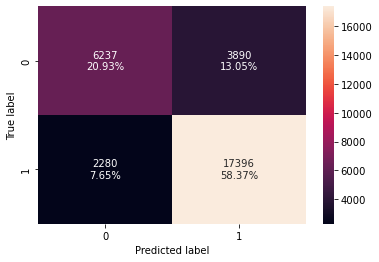

<IPython.core.display.Javascript object>

In [105]:
# creating confusion matrix
confusion_matrix_statsmodels(lg4, X_train4, y_train)

In [106]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg4, X_train4, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.792974,0.884123,0.817251,0.849373


<IPython.core.display.Javascript object>

### ROC AUC Curve on the training set

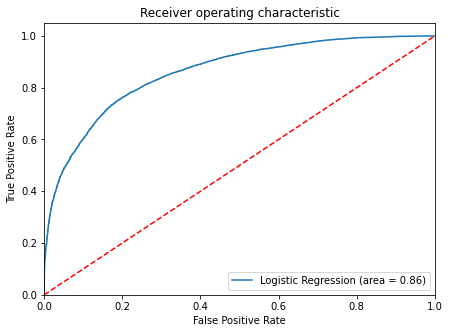

<IPython.core.display.Javascript object>

In [107]:
logit_roc_auc_train = roc_auc_score(y_train, lg4.predict(X_train4))
fpr, tpr, thresholds = roc_curve(y_train, lg4.predict(X_train4))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**We can see the logistic regression model is giving good performance on training set, with area .86**

### Model Performance improvement

- Let's see if the reacll score can be improved further, by changing the model threshold using AUC-ROC Curve.

#### Finding optimal threshold using ROC-AUC curve

In [108]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg4.predict(X_train4))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.6979802720366193


<IPython.core.display.Javascript object>

#### Checking model performance using .69 threshold

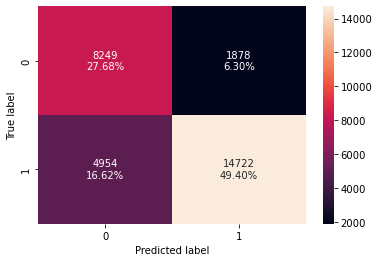

<IPython.core.display.Javascript object>

In [109]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg4, X_train4, y_train, threshold=optimal_threshold_auc_roc
)

In [110]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg4, X_train4, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.770761,0.748221,0.886867,0.811666


<IPython.core.display.Javascript object>

#### Observations:

- We can see our model performance has decreased with metric Accuracy, Recall, and F1.
- We can see increase in Precision metric

#### Let's use Precision-Recall curve and see if we can find a better threshold

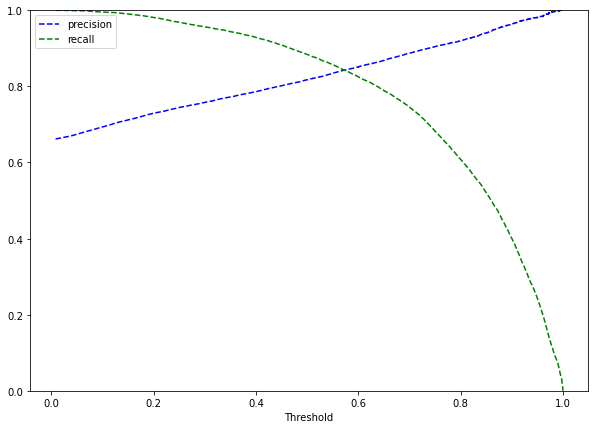

<IPython.core.display.Javascript object>

In [111]:
y_scores = lg4.predict(X_train4)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

- **At threshold .58 precision and recall gives a good balance**

In [112]:
# setting the threshold
optimal_threshold_curve = 0.58

<IPython.core.display.Javascript object>

#### Checking model performance using .58 threshold

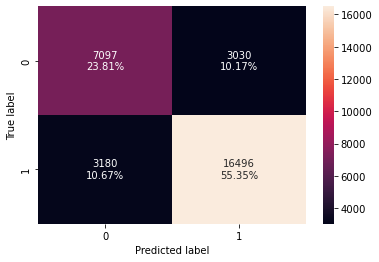

<IPython.core.display.Javascript object>

In [113]:
# creating confusion matrix
confusion_matrix_statsmodels(lg4, X_train4, y_train, threshold=optimal_threshold_curve)

In [114]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg4, X_train4, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.791632,0.838382,0.844822,0.84159


<IPython.core.display.Javascript object>

#### Observations:

- Model performance is better than .69 threshold, but not better than default threshold of .5

### Let's check the performance on test set

**Dropping the columns from test set that were dropped from train**

In [115]:
X_train4.columns

Index(['no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
       'required_car_parking_space', 'lead_time', 'arrival_month',
       'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room',
       'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5',
       'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7',
       'market_segment_type_Corporate', 'market_segment_type_Online', 'const'],
      dtype='object')

<IPython.core.display.Javascript object>

In [116]:
X_test4 = X_test[list(X_train4.columns)]

<IPython.core.display.Javascript object>

#### Using model default threshold

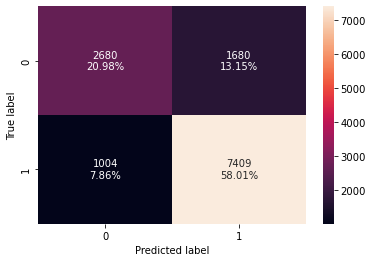

<IPython.core.display.Javascript object>

In [117]:
# creating confusion matrix
confusion_matrix_statsmodels(lg4, X_test4, y_test)

In [118]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg4, X_test4, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.789869,0.880661,0.815161,0.846646


<IPython.core.display.Javascript object>

**ROC Curve on test set**

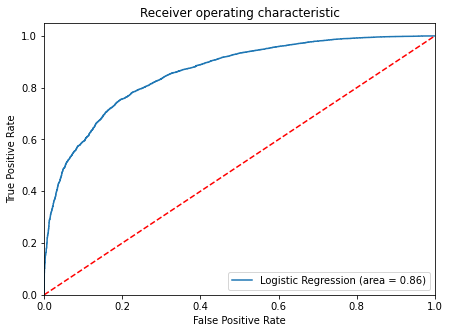

<IPython.core.display.Javascript object>

In [119]:
logit_roc_auc_test = roc_auc_score(y_test, lg4.predict(X_test4))
fpr, tpr, thresholds = roc_curve(y_test, lg4.predict(X_test4))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model threshold .69**

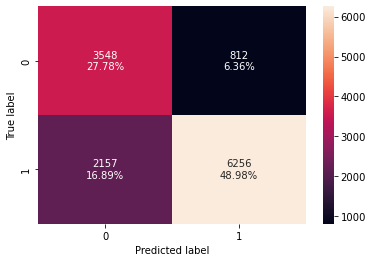

<IPython.core.display.Javascript object>

In [120]:
# creating confusion matrix
confusion_matrix_statsmodels(lg4, X_test4, y_test, threshold=optimal_threshold_auc_roc)

In [121]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg4, X_test4, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.767557,0.743611,0.885116,0.808217


<IPython.core.display.Javascript object>

**Using model threshold .58**

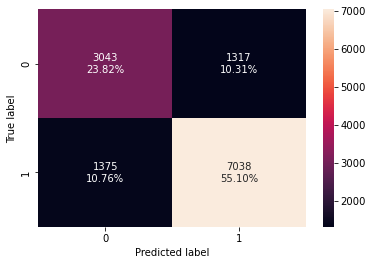

<IPython.core.display.Javascript object>

In [122]:
# creating confusion matrix
confusion_matrix_statsmodels(lg4, X_test4, y_test, threshold=optimal_threshold_curve)

In [123]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg4, X_test4, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.789243,0.836562,0.84237,0.839456


<IPython.core.display.Javascript object>

## Final Model Performance Summary

**Training performance comparison of final model**

In [124]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression default Threshold",
    "Logistic Regression-0.69 Threshold",
    "Logistic Regression-0.58 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression default Threshold,Logistic Regression-0.69 Threshold,Logistic Regression-0.58 Threshold
Accuracy,0.792974,0.770761,0.791632
Recall,0.884123,0.748221,0.838382
Precision,0.817251,0.886867,0.844822
F1,0.849373,0.811666,0.841590


<IPython.core.display.Javascript object>

**Test performance comparison of final model**

In [125]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression default Threshold",
    "Logistic Regression-0.69 Threshold",
    "Logistic Regression-0.58 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression default Threshold,Logistic Regression-0.69 Threshold,Logistic Regression-0.58 Threshold
Accuracy,0.789869,0.767557,0.789243
Recall,0.880661,0.743611,0.836562
Precision,0.815161,0.885116,0.842370
F1,0.846646,0.808217,0.839456


<IPython.core.display.Javascript object>

#### Summary:

- We can see the default threshold on our final model gives us the best recall value which is our key performance metric.
- For both train and test we get similar recall value, which tells us the model is not overfitted
- With ~88% recall value we can say that our model is correctly predicting if a booking will be cancelled 88% of the time.

## Building a Decision Tree model

#### Preparing data for modeling

In [126]:
xd = dfshg_dummy.drop("booking_status", axis=1)  # getting features
yd = dfshg_dummy["booking_status"]  # getting target variable

<IPython.core.display.Javascript object>

In [127]:
# Splitting data into training and test set:
X_traind, X_testd, y_traind, y_testd = train_test_split(
    xd, yd, test_size=0.3, random_state=42
)
print(X_traind.shape, X_testd.shape)

(29803, 29) (12773, 29)


<IPython.core.display.Javascript object>

In [128]:
print("Percentage of classes in training set:")
print(y_traind.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_testd.value_counts(normalize=True))

Percentage of classes in training set:
1    0.660202
0    0.339798
Name: booking_status, dtype: float64
Percentage of classes in test set:
1    0.658655
0    0.341345
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

#### Writing functions to get model metric

In [129]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

<IPython.core.display.Javascript object>

In [130]:
def confusion_matrix_dtree(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

#### Building the model using DecisionTreeClassifier

- As we have observed above that our class 0 is ~34% and class 1 is ~66%, we will use class weight hyperparameter to specify the weightage of each class so that the model doesn't get biased towards dominant class. 
- We will also use 'gini' as default criteria to split

In [131]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.34, 1: 0.66}, random_state=42
)

<IPython.core.display.Javascript object>

In [132]:
model.fit(X_traind, y_traind)

DecisionTreeClassifier(class_weight={0: 0.34, 1: 0.66}, random_state=42)

<IPython.core.display.Javascript object>

#### Checking the model performance on training set

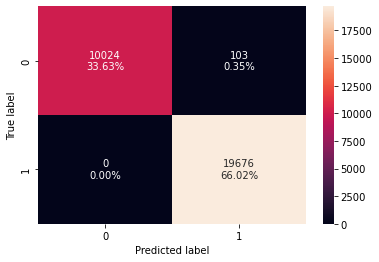

<IPython.core.display.Javascript object>

In [133]:
confusion_matrix_dtree(model, X_traind, y_traind)

In [134]:
decision_tree_perf_train = get_recall_score(model, X_traind, y_traind)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 1.0


<IPython.core.display.Javascript object>

#### Observations:

- Model is giving recall score of 1 which means model is correctly identifying all 0 classes.
- However as we know decision tree will continue to grow and identify each datapoint if we do not restrict it via hyperparameter, this leads to overfitting.
- But first let's check the performance in test set

#### Checking model performance on test set

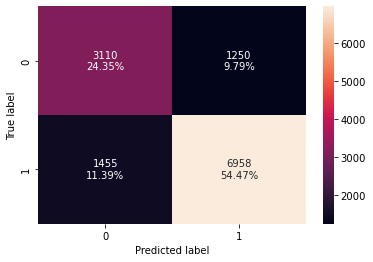

<IPython.core.display.Javascript object>

In [135]:
confusion_matrix_dtree(model, X_testd, y_testd)

In [136]:
decision_tree_perf_test = get_recall_score(model, X_testd, y_testd)

print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.8270533697848568


<IPython.core.display.Javascript object>

#### Observations:

- We can see our model on test set giving recall of ~.82, which is not bad, but very less than how it performed on training set.
- The tree has overgrown and overfitted. We will use hyperparameter tuning to prune the tree and see if model can be generalized to perform similar on both train and test

### Before we prune the tree as it's overfitted, let's check which features are important

In [137]:
# Creating a dataframe with the feature names as index and the feature importances/gini importance we got from our model

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_traind.columns
    ).sort_values(by="Imp", ascending=False)
)

                                               Imp
lead_time                             3.300358e-01
avg_price_per_room                    1.761623e-01
no_of_special_requests                1.008307e-01
arrival_date                          9.323926e-02
market_segment_type_Online            6.083045e-02
arrival_month                         5.808150e-02
stay_duration                         3.870478e-02
no_of_week_nights                     3.587465e-02
no_of_weekend_nights                  2.637676e-02
no_of_adults                          1.771419e-02
arrival_year                          1.747018e-02
room_type_reserved_Room_Type 4        1.015643e-02
type_of_meal_plan_Not Selected        7.790340e-03
no_of_children                        6.637835e-03
required_car_parking_space            5.632568e-03
type_of_meal_plan_Meal Plan 2         4.884559e-03
room_type_reserved_Room_Type 5        3.317699e-03
room_type_reserved_Room_Type 2        3.184436e-03
room_type_reserved_Room_Type 6 

<IPython.core.display.Javascript object>

#### Let's visualize it to have better understanding

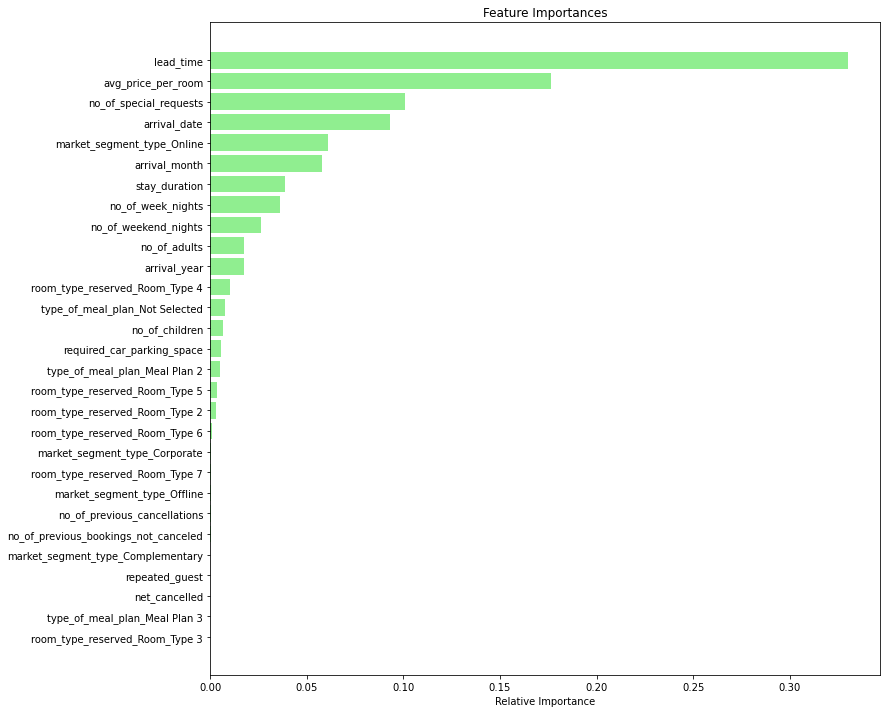

<IPython.core.display.Javascript object>

In [138]:
## creating a list of column names
feature_names = X_traind.columns.to_list()
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="lightgreen", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations:

- According to the model, lead_time is the most important parameter to predict the booking status
- average price per room, no of special requests are the next 2 important features in order.

## Do we need to prune the tree?

- The answer is **Yes**, as we have seen our model is not performing well on test set as it is on the training set.
- We will use GridSearchCV method to find the best hyperparameter.

### Reducing Overfitting by finding best parameter and build model

In [139]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=42, class_weight={0: 0.34, 1: 0.66})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_traind, y_traind)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_traind, y_traind)

DecisionTreeClassifier(class_weight={0: 0.34, 1: 0.66}, criterion='entropy',
                       max_depth=5, min_impurity_decrease=0.01,
                       random_state=42)

<IPython.core.display.Javascript object>

#### Checking performance on training set

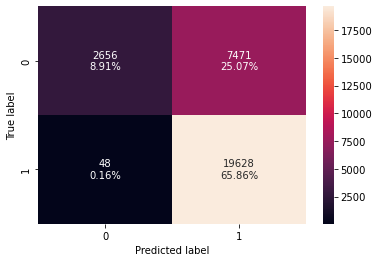

<IPython.core.display.Javascript object>

In [140]:
confusion_matrix_dtree(estimator, X_traind, y_traind)

In [141]:
decision_tree_tune_perf_train = get_recall_score(estimator, X_traind, y_traind)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.9975604797723114


<IPython.core.display.Javascript object>

#### Checking performance on test set

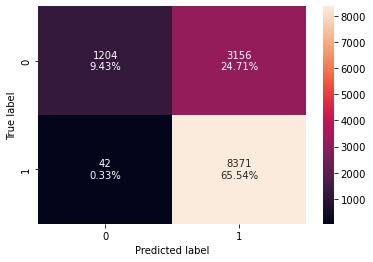

<IPython.core.display.Javascript object>

In [142]:
confusion_matrix_dtree(estimator, X_testd, y_testd)

In [143]:
decision_tree_tune_perf_test = get_recall_score(estimator, X_testd, y_testd)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.9950077261381196


<IPython.core.display.Javascript object>

#### Observations:

- We can see the tuned model is performing similar for both training and test set.
- We can consider this as a generalized model

### Let's check the feature importances for the pruned decision tree model

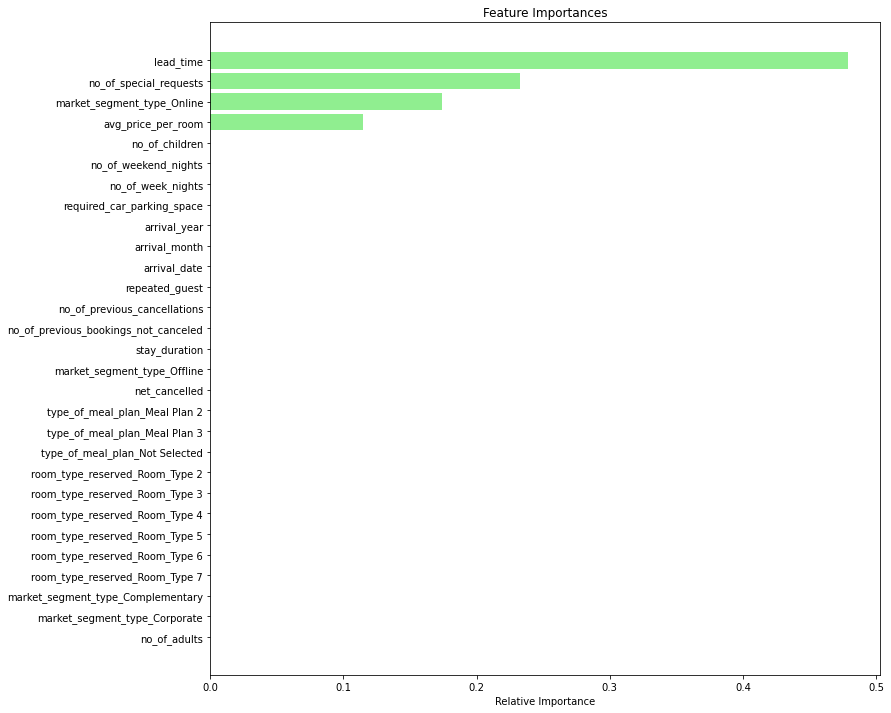

<IPython.core.display.Javascript object>

In [144]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="lightgreen", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations:

- lead time is still the most important feature for predicting cancellation.
- no of special requests, market segment online, average room price are some features which are important for the pruned decision tree

## Model Performance Comparison and Conclusions

In [145]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [decision_tree_perf_train, decision_tree_tune_perf_train,],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Recall on training set
0,1.00000
1,0.99756


<IPython.core.display.Javascript object>

In [146]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [decision_tree_perf_test, decision_tree_tune_perf_test,],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Recall on testing set
0,0.827053
1,0.995008


<IPython.core.display.Javascript object>

#### Conclusion on Decision tree models:

- We can observe decision tree with no pruning is overfitted as test set recall is way lower than training set.
- After pruning and used the best parameter chosen by Grid search, the performance of the pruned tree is consistent between train and test set.
- Hence we will consider estimator, best model chosen by Grid search is the final model.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

### Actionable Insights:

- Online bookings have highest cancellation rate, might be a cancellation fee after a fee free time period should be implemented to target to lower the cancellation.
- Cancellation fee should be prorated based on no of lead days remain before arrival date at the time of cancellation
- Analyzing what kind of special requests are made, and offering some complementary with the booking could lower the cancellation counts on the bookings no special requests made.
- For repeated guests cancellation is lower, however offering some loyalty program could further reduce the cancellation
- Machine Learning model should be used to predict the cancellation, and based on capacity and no of predicted cancellation rooms can be sold with enough lead time so that discounted price can be avoided.


### Recommendations:

- Capturing cancellation reason and analyzing further can lead to other findings which could be useful for making policies around cancellation.
- Online has the majority booking rate, capturing geo location and analyzing the pattern of cancellation could be further useful.
- Providing discounted rate, or bonus stays, should be explored for the time period other than March to August.
- Using the Machine Learning model will be beneficial to predict cancellations, however the rooms should be sold based on capacity and no of predicted cancellation. Over a time period the data should be collected and overbooked data should be further analyzed to find the correct ratio of overbooking. 